<a href="https://colab.research.google.com/github/dellaar/Della_Portofolio/blob/main/Mengidentifikasi_Penyakit_Jantung_dengan_Pendekatan_Machine_Learning_dan_Analisis_Korespondensi_MCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Della Rahmania Iswansyah**

#**PREDIKSI KEMUNGKINAN TERJADINYA PENYAKIT JANTUNG**
Sebagai seorang associate data scientist, Anda ditugaskan untuk melakukan prediksi terhadap kemungkinan terjadinya penyakit jantung.

**Latar Belakang**

Cardiovascular desease (CVD) atau penyakit kardiovaskuler merupakan salah satu penyebab kematian nomor satu secara global. Diestimasikan telah merenggut nyawa sekitar 18 juta jiwa setiap tahunnya atau 31% dari seluruh penyebab kematian secara global. Empat dari lima kematian CVD diakibatkan oleh serangan jantung dan stroke, dan sepertiganya dialami secara prematur oleh sesorang dengan usia di bawah 70 tahun.

Kegagalan jantung merupakan salah salah penyebab umum dari penyakit kardiovaskuler. Sebagai seorang associate data scientist, Saya ditugaskan untuk melakukan prediksi terhadap kemungkinan terjadinya penyakit jantung. Diharapkan pemodelan yang dihasilkan dapat membantu kinerja dokter dalam mendeteksi pasien dengan penyakit jantung, sehingga dapat menolong lebih banyak orang yang berisiko tinggi terkena penyakit
kardiovaskuler.

**Tujuan**

Akan digunakan model decision tree dan regresi logistik, untuk menentukan apakah seorang pasien menderita penyakit jantung atau tidak. dan berdasarkan hasil pemodelan data
- evaluasi kinerja model klasifikasi
- interpretasi fitur-fitur mana yang paling berpengaruh terhadap fitur target

Dataset berisi informasi medis yang berkaitan dengan penyakit jantung. Berikut adalah pemahaman rinci tentang fitur-fitur dalam dataset:

* Data Penyakit Jantung
* Variabel Target: Apakah seorang pasien mengidap penyakit jantung atau tidak
***HartDisease**: (1: Penyakit jantung, 0: Normal).
* Variabel Prediktor:
1. **Age (Umur)**: Usia pasien dalam tahun. Usia dapat mempengaruhi risiko penyakit jantung, dengan risiko biasanya meningkat seiring bertambahnya usia.
2. **Sex (Jenis Kelamin)**: Jenis kelamin pasien  (M: Male, F: Female). Penyakit jantung dapat mempengaruhi laki-laki dan perempuan secara berbeda.
3. **ChestPainType (Tipe Nyeri Dada)**: Jenis nyeri dada yang dialami pasien (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic). Nyeri dada adalah gejala umum dari penyakit jantung.
4. **RestingBP (Tekanan Darah Istirahat)**: Tekanan darah istirahat dalam mm Hg. Tekanan darah tinggi dapat meningkatkan risiko penyakit jantung.
5. **Cholesterol (Kolesterol Serum)**: Kadar kolesterol serum dalam mg/dl. Kolesterol tinggi dapat meningkatkan risiko penyakit jantung.
6. **FastingBS (Gula darah puasa)**: (1: Jika FastingBS > 120 mg/dl, 0: Sebaliknya). Diabetes dapat meningkatkan risiko penyakit jantung.
7. **RestingECGBaru (Elektrokardiogram Istirahat)**: Hasil elektrokardiogram istirahat (1: Jika ada abnormalitas, 0: Sebaliknya). Abnormalitas dalam EKG dapat menunjukkan penyakit jantung.
8. **MaxHRBaru (Denyut Jantung Maksimum)**: Denyut jantung maksimum yang dicapai pasien. Denyut jantung yang abnormal selama atau setelah olahraga dapat menunjukkan penyakit jantung.
9. **ExerciseAngina (Angina Selama Latihan)**: Angina yang diinduksi oleh olahraga  (nilai numerik antara 60 dan 202). Angina adalah nyeri atau ketidaknyamanan yang terjadi ketika otot jantung tidak mendapatkan cukup oksigen.
10. **Oldpeak (Depresi ST)**: Depresi ST yang diukur dalam mm. Depresi ST dapat menunjukkan penyakit jantung iskemik.
11. **ST_Slope (Kemiringan Segmen ST)**: Kemiringan puncak segmen ST selama latihan (Up: Naik, Flat: Datar, Down: Turun). Kemiringan ST dapat menunjukkan penyakit jantung iskemik.

#<h1><strong><font color="blue">1. Mengumpulkan data</font></strong></h1></center>

##<h1><strong><font color="blue">Install dan Import Modul</font></strong></h1></center>

In [ ]:
# Visual Python: Data Analysis > Sweetviz
!pip install sweetviz
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 39.4 MB/s eta 0:00:00


In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import time, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
plt.style.use('bmh'); sns.color_palette("tab20"); sns.set()
import sweetviz
import graphviz
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

In [ ]:
file_ = 'data/heart.csv'
try:
    df = pd.read_csv(file_)
except:
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/arubhasy/dataset/main/heart.csv
    df = pd.read_csv(file_)

N, P = df.shape
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

--2023-11-18 07:16:39--  https://raw.githubusercontent.com/arubhasy/dataset/main/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35902 (35K) [text/plain]
Saving to: ‘data/heart.csv’

heart.csv           100%[===================>]  35.06K  --.-KB/s    in 0.006s  

2023-11-18 07:16:39 (5.40 MB/s) - ‘data/heart.csv’ saved [35902/35902]

baris =  918 , Kolom (jumlah variabel) =  12


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#<h1><strong><font color="blue">2. Menelaah data (EDA)</font></strong></h1></center>



###<center><h1><strong><font color="blue"> Memuat tipe data dan karakteristik data </font></strong></h1></center>

In [ ]:
#menganalisis tipe data
df = pd.DataFrame(df)

print("DataFrame Sebelum Perubahan:")
print(df)

# Menukar nama kolom 'MaxHR' menjadi 'RestingECGBaru', dan 'RestingECG' menjadi 'MaxHRBaru'
df.rename(columns={'MaxHR': 'RestingECGBaru', 'RestingECG': 'MaxHRBaru'}, inplace=True)

print("\nDataFrame Setelah Perubahan:")
df

DataFrame Sebelum Perubahan:
      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     NaN   M           ATA        140          289          0     Normal   
1    49.0   F           NAP        160          180          0     Normal   
2    37.0   M           ATA        130          283          0         ST   
3    48.0   F           ASY        138          214          0     Normal   
4    54.0   M           NAP        150          195          0     Normal   
..    ...  ..           ...        ...          ...        ...        ...   
913  45.0   M            TA        110          264          0     Normal   
914  68.0   M           ASY        144          193          1     Normal   
915  57.0   M           ASY        130          131          0     Normal   
916  57.0   F           ATA        130          236          0        LVH   
917  38.0   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  H

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHRBaru,RestingECGBaru,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68.0,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57.0,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57.0,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Dataset terdiri atas 918 baris dan 12 kolom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   MaxHRBaru       918 non-null    object 
 7   RestingECGBaru  918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [ ]:
varObjects = df.select_dtypes(include = ['object'])
varObjects.head()

,Sex,ChestPainType,MaxHRBaru,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [ ]:
#mengubah kolom menjadi tipe kategorik
for col in varObjects.columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             911 non-null    float64 
 1   Sex             908 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   MaxHRBaru       918 non-null    category
 7   RestingECGBaru  918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(2), int64(5)
memory usage: 55.5 KB


Mengubah data bertipe kategorik yang "object" menjadi "kategorik" yaitu untuk Variabel Sex, ChestPainType, MaxHRBaru, ExerciseAngina dan ST_Slope

In [ ]:
#mengubah tipe data menjadi kategorik
df['FastingBS'] = df['FastingBS'].astype('category')
df['HeartDisease'] = df['HeartDisease'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             911 non-null    float64 
 1   Sex             908 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   MaxHRBaru       918 non-null    category
 7   RestingECGBaru  918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    category
dtypes: category(7), float64(2), int64(3)
memory usage: 43.2 KB


- Variabel FastingBS dan HeartDisease berisi angka 0 dan angka 1 yang bertipe kategorik.
- Angka 0 dan 1 merupakan variabel dummy dan diasumsikan sebagai kategorik sehingga variabel FastingBS dan HeartDisease diubah menjadi tipe kategorik.
- Variabel ExerciseAngina berisi kategori N dan Y yang tidak dijelaskan dalam informasi fitur data. **saya asumsikan** variabel tersebut bermanfaat.

In [ ]:
# Menganalisis karakteristik data dengan deskripsi statistika dasar
df.describe()

,Age,RestingBP,Cholesterol,RestingECGBaru,Oldpeak
count,911.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,136.809368,0.887364
std,12.988393,18.514154,109.384145,25.460334,1.066570
min,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,177.000000,200.000000,603.000000,202.000000,6.200000


**Data yang Hilang:**  terlihat karena "count/jumlah" tidak sesuai dengan data awal.
   - Terdapat beberapa data yang hilang (NaN) pada kolom 'Age' (7 nilai kosong) dan 'Sex' (10 nilai kosong). Nanti akan diatasi pada tahapan **membersihkan data**
- **Age:**
Pasien memiliki umur rata-rata sekitar 54 tahun, dengan umur terendah 0 tahun dan tertinggi 177 tahun.
- **RestingBP:**
Tekanan darah istirahat pasien rata-rata sekitar 132 mm Hg, dengan tekanan darah terendah 0 mm Hg dan tertinggi 200 mm Hg.
- **Cholesterol:**
Kadar kolesterol serum pasien rata-rata sekitar 199 mg/dl, dengan kadar terendah 0 mg/dl dan tertinggi 603 mg/dl.
- **RestingECGBaru:**
Hasil elektrokardiogram istirahat pasien rata-rata sekitar 136.8, dengan hasil terendah 60 dan tertinggi 202.
- **Oldpeak:**
Depresi segmen ST pasien rata-rata sekitar 0.89, dengan depresi terendah -2.6 dan tertinggi 6.2.

**Laporan Penelaahan Data:**
1. **Struktur Data:**
   - Dataset terdiri dari 918 baris dan 12 kolom.
   - Kolom-kolom tersebut mencakup berbagai jenis data, termasuk variabel numerik (float64 dan int64) dan kategori (category).

2. **Tipe Data:**
   - Variabel numerik kategorik 'Age', 'RestingBP', 'Cholesterol', 'RestingECGBaru', dan 'Oldpeak'.
   - Variabel kategorik adalah  'Sex', 'ChestPainType', 'FastingBS', 'MaxHRBaru', 'ExerciseAngina', 'ST_Slope', dan 'HeartDisease'.

3. **Data yang Hilang:**  terlihat karena "count/jumlah" tidak sesuai dengan data awal.
   - Terdapat beberapa data yang hilang (NaN) pada kolom 'Age' (7 nilai kosong) dan 'Sex' (10 nilai kosong). Nanti akan diatasi pada tahapan **membersihkan data**

4. **Statistik Deskriptif:**
   - **Age (Umur):**
     - Rata-rata umur pasien adalah sekitar 54 tahun, dengan nilai minimum 0 (mungkin data yang tidak valid) dan maksimum 177 (nilai yang mungkin tidak valid).
     - Standar deviasi yang moderat menunjukkan variasi yang relatif stabil, standar deviasi sekitar 13.

   - **RestingBP (Tekanan Darah Istirahat):**
     - Rata-rata tekanan darah istirahat adalah sekitar 132 mm Hg, dengan nilai minimum 0 (mungkin data yang tidak valid) dan maksimum 200 mm Hg.
     - Standar deviasi yang moderat menunjukkan variasi yang relatif stabil, standar deviasi sekitar 18.5.

   - **Cholesterol (Kolesterol Serum):**
     - Rata-rata kolesterol serum adalah sekitar 199 mg/dl, dengan nilai minimum 0 (mungkin data yang tidak valid) dan maksimum 603 mg/dl.
     - Standar deviasi yang tinggi menunjukkan variasi yang signifikan dalam distribusi kolesterol, standar deviasi sekitar 109.

   - **RestingECGBaru (Elektrokardiogram Istirahat Baru):**
     - Rata-rata nilai elektrokardiogram istirahat baru adalah sekitar 136.8, dengan nilai minimum 60 dan maksimum 202.
     - Standar deviasi sekitar 25.5.

   - **Oldpeak (Depresi ST):**
     - Rata-rata depresi segmen ST adalah sekitar 0.89, dengan nilai minimum -2.6 dan maksimum 6.2.
     - Standar deviasi yang tinggi menunjukkan variasi yang signifikan dalam depresi ST, standar deviasi sekitar 1.07.

#<center><h1><strong><font color="blue">3. Memvalidasi Data dengan (EDA) </font></strong></h1></center>



## Memeriksa Noise

### Check Noise via Statistika Deskriptif

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,RestingECGBaru,Oldpeak
count,911.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,136.809368,0.887364
std,12.988393,18.514154,109.384145,25.460334,1.066570
min,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,177.000000,200.000000,603.000000,202.000000,6.200000


Diasumsikan bahwa beberapa hal ini merupakan noise:
   - Beberapa variabel memiliki nilai minimum yang tampaknya tidak mungkin berdasarkan domain knowledge (misalnya 'Age', dan 'RestingBP' dan 'Cholesterol'), yang mungkin menunjukkan adanya data yang hilang atau kesalahan entri.

### Check Noise pada Variabel Kategorik
<center><h1><strong><font color="blue"> (EDA): Check Noise di Variabel kategorik</font></strong></h1></center>


In [ ]:
catVar = df.select_dtypes(include = ['object', 'category'])

for col in catVar.columns:
    print(col,': ', set(df[col].unique()))

Sex :  {'M', nan, 'F'}
ChestPainType :  {'ASY', 'ATA', 'NAP', 'TA'}
FastingBS :  {0, 1}
MaxHRBaru :  {'ST', 'Normal', 'LVH'}
ExerciseAngina :  {'N', 'Y'}
ST_Slope :  {'Flat', 'Down', 'Up'}
HeartDisease :  {0, 1}


Check Noise berdasarkan code seleksi variabel untuk setiap variabel kategorik ketika diperhatikan setiap barisnya dengan data understanding, diperoleh bahwa pada variabel "Sex" terdapat noise kata yg tidak beraturan yaitu "nan", maka **saya asumsikan sebagai missing value** maka direplace agar sesuai dengan kaidah bahasa python. Namun untuk validasi di dunia industri akan saya konfirmasi terlebih dahulu ke atasan terkait data ini

In [ ]:
import numpy as np

df['Sex'] = df['Sex'].replace(to_replace='nan', value=np.nan)
for col in catVar.columns:
    print(col,': ', set(df[col].unique()))

Sex :  {'M', nan, 'F'}
ChestPainType :  {'ASY', 'ATA', 'NAP', 'TA'}
FastingBS :  {0, 1}
MaxHRBaru :  {'ST', 'Normal', 'LVH'}
ExerciseAngina :  {'N', 'Y'}
ST_Slope :  {'Flat', 'Down', 'Up'}
HeartDisease :  {0, 1}


### Check Noise di Variabel Numerik
<center><h1><strong><font color="blue">(EDA): Check Noise di Variabel Numerik</font></strong></h1></center>

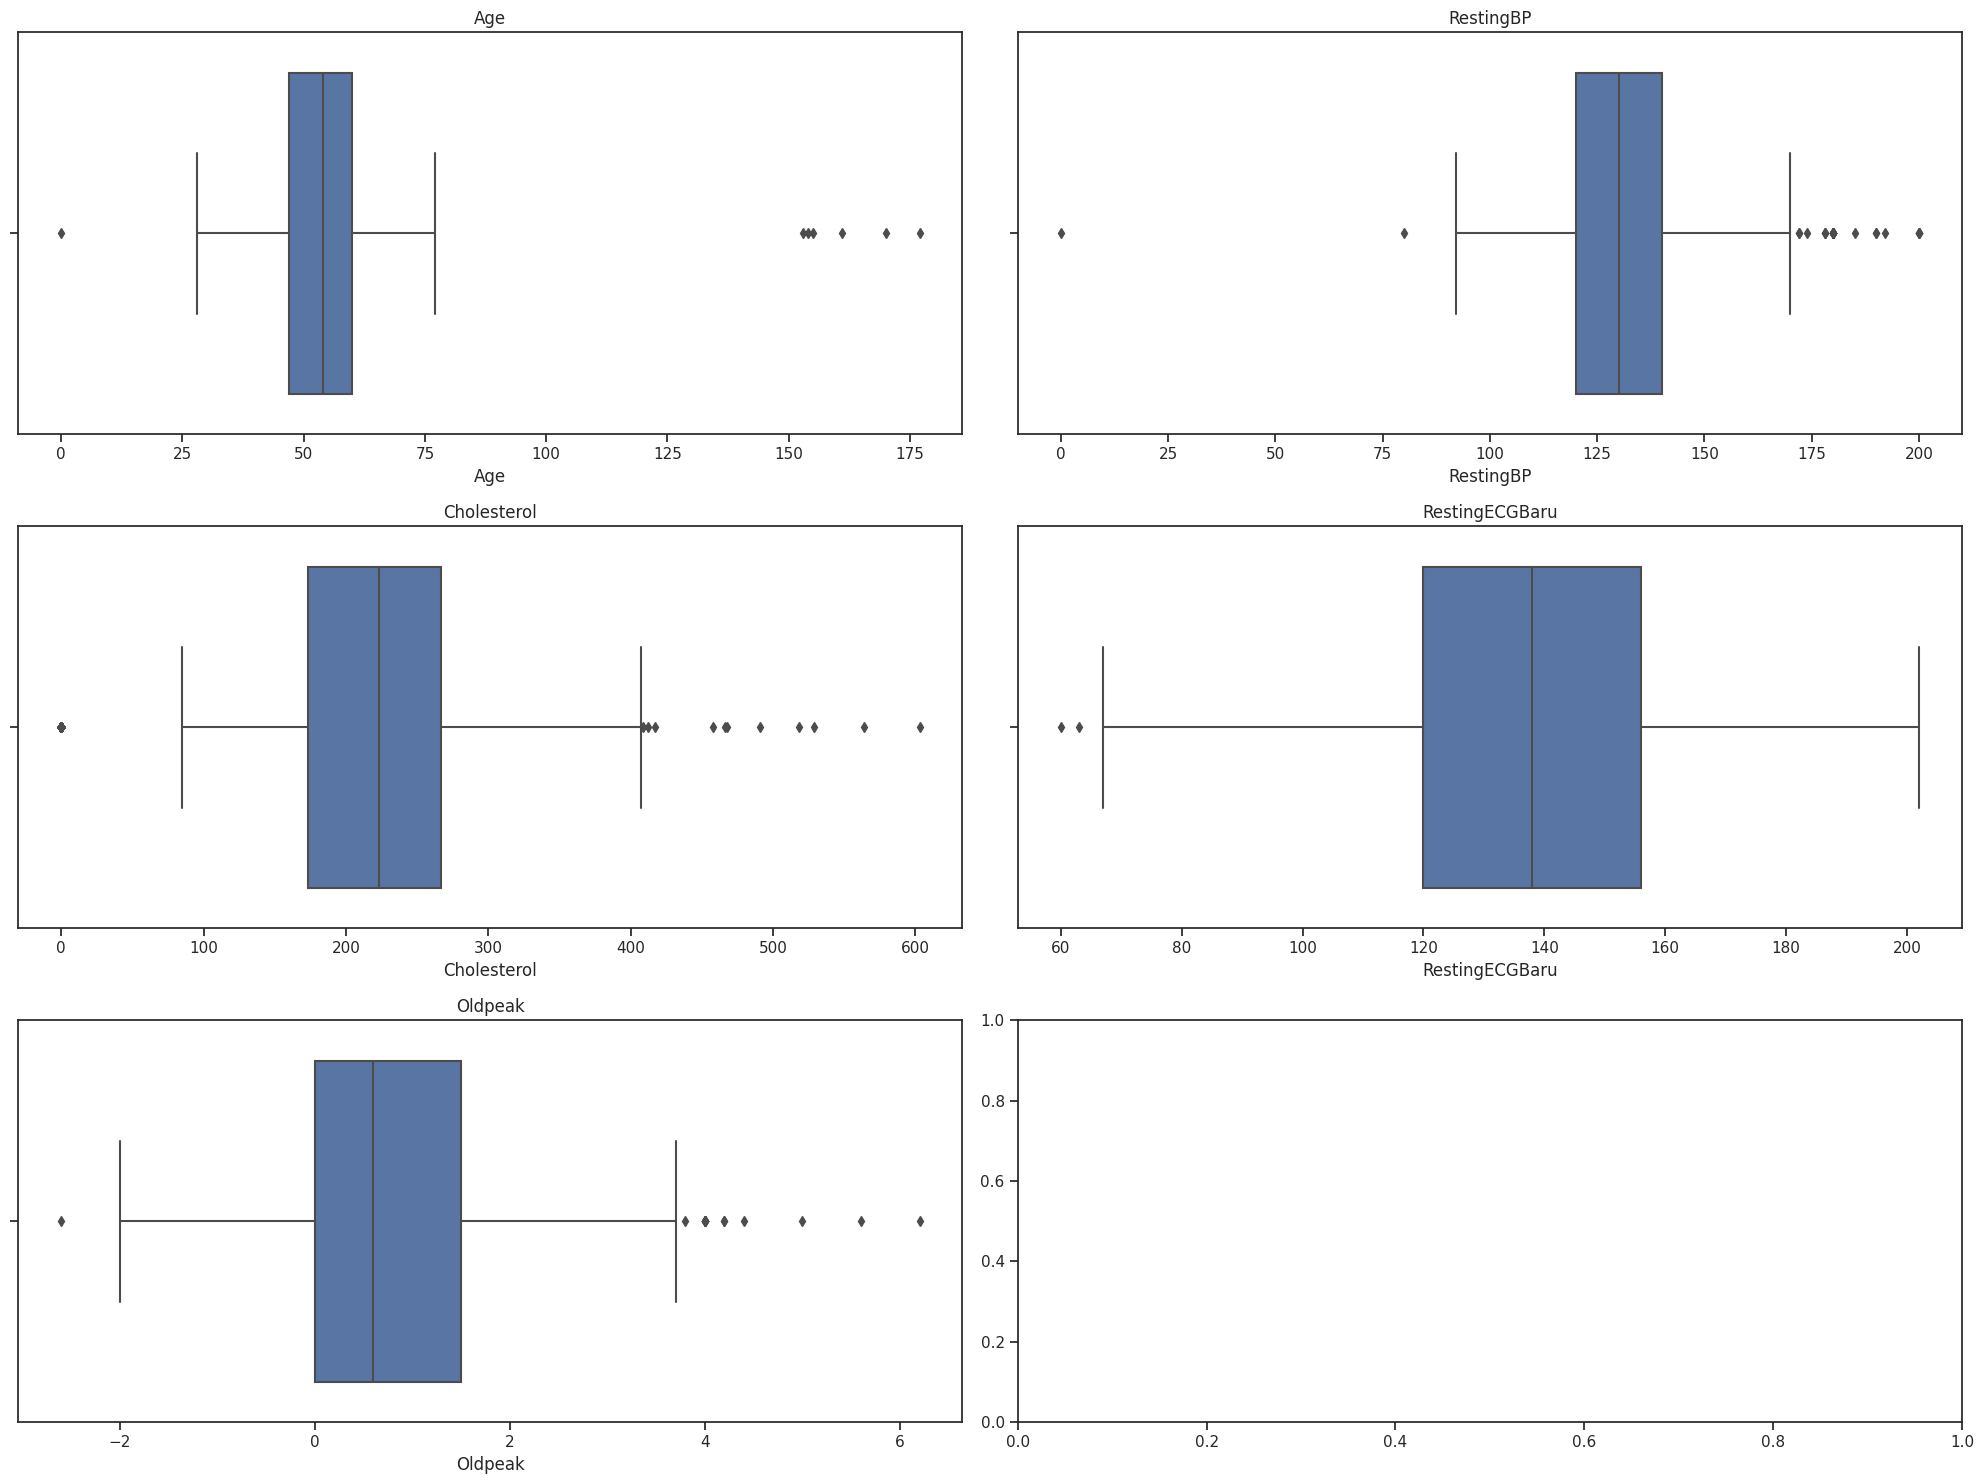

              Age   RestingBP  Cholesterol  RestingECGBaru     Oldpeak
count  911.000000  918.000000   918.000000      918.000000  918.000000
mean    54.102086  132.396514   198.799564      136.809368    0.887364
std     12.988393   18.514154   109.384145       25.460334    1.066570
min      0.000000    0.000000     0.000000       60.000000   -2.600000
25%     47.000000  120.000000   173.250000      120.000000    0.000000
50%     54.000000  130.000000   223.000000      138.000000    0.600000
75%     60.000000  140.000000   267.000000      156.000000    1.500000
max    177.000000  200.000000   603.000000      202.000000    6.200000


In [ ]:
# Check menggunakan boxplot untuk setiap variabel numerik
# Dapatkan variabel numerik
variabel_numerik = df.select_dtypes(include='number').columns

# Tentukan ukuran grid berdasarkan jumlah variabel numerik
num_rows = len(variabel_numerik) // 2
num_cols = 2
if len(variabel_numerik) % 2 != 0:
    num_rows += 1

# Create a figure and a grid of axes
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Create boxplots for each numeric variable
for i, var in enumerate(variabel_numerik):
    sns.boxplot(data=df, x=var, ax=axs[i // 2, i % 2])
    axs[i // 2, i % 2].set_title(var)

plt.tight_layout()
plt.show()

# Print the descriptive statistics
print(df[variabel_numerik].describe())


In [ ]:
import matplotlib.pyplot as plt, seaborn as sns
plt.style.use('bmh'); sns.color_palette("tab20"); sns.set()

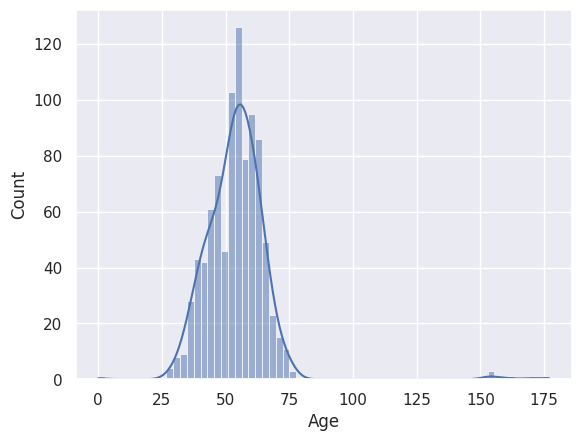

,Age
count,911.000000
mean,54.102086
std,12.988393
min,0.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,177.000000


In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=df, x='Age', kde=True)
plt.show()
df[['Age']].describe()

Berdasarkan output di atas, pada variabel "Age" grafik distribusi cenderung skew kanan sehingga terlihat bahwa ada outlier yaitu maksimum umur pasien adalah yang lebih dari 125 tahun.

In [ ]:
df["Age"].unique()

array([ nan,  49.,  37.,  48.,  54.,  39.,  45.,  58.,  42.,  38.,  43.,
        60.,  36.,  44.,  40.,  53.,  52.,  51.,  56.,  41.,  32.,  65.,
        35.,  59.,  50.,  47.,  31.,  46.,  57., 155.,  55.,  63.,  66.,
        34.,  33.,  61.,  29.,  62.,  28.,  30.,  74.,  68.,   0.,  72.,
        64.,  69.,  67.,  73.,  70., 161., 177.,  75.,  76.,  71., 153.,
       170., 154.,  77.])

Berdasarkan nilai di atas, terdapat noise yaitu pasien dengan usia 0, 153, 154, 155, 161, 170 dan 177. Diasumsikan bahwa ini merupakan noise dan akan dilakukan drop baris.


In [ ]:
df.drop(df[df['Age'] == 0.].index, inplace=True)
df.drop(df[df['Age'] == 153.].index, inplace=True)
df.drop(df[df['Age'] == 154.].index, inplace=True)
df.drop(df[df['Age'] == 155.].index, inplace=True)
df.drop(df[df['Age'] == 161.].index, inplace=True)
df.drop(df[df['Age'] == 170.].index, inplace=True)
df.drop(df[df['Age'] == 177.].index, inplace=True)
print(df.shape)
df.head(5)

(911, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHRBaru,RestingECGBaru,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


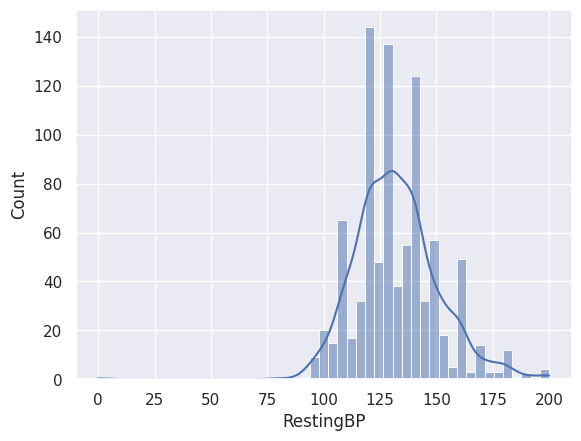

,RestingBP
count,911.000000
mean,132.342481
std,18.537314
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=df, x='RestingBP', kde=True)
plt.show()
df[['RestingBP']].describe()

Berdasarkan output di atas dappat dilihat bahwa grafik histogram cenderung berdistribusi normal.

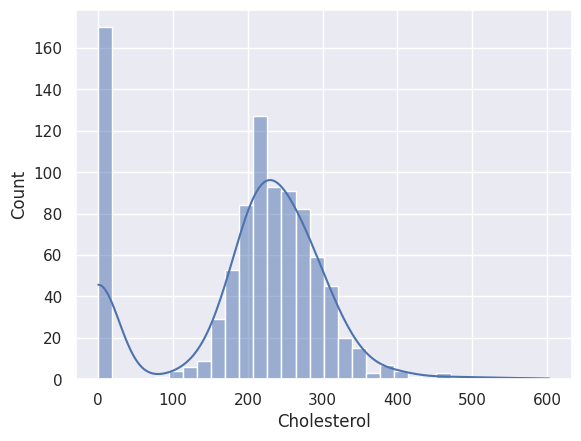

,Cholesterol
count,911.000000
mean,199.036224
std,109.342489
min,0.000000
25%,174.500000
50%,223.000000
75%,267.000000
max,603.000000


In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=df, x='Cholesterol', kde=True)
plt.show()
df[['Cholesterol']].describe()

Berdasarkan output di atas dapat dilihat bahwa grafik histogram pada variabel Cholesterol cenderung berdistribusi normal. dah terdapat pasien yang memiliki serum kolesterol sebesar 0 mm/hg dan ada juga sebesar 603 mm/hg.
* Untuk serum kolesterol sebesar 0 mm/hg diasumsikan bahwa tidak ada orang yang memiliki kadar serum kolesterol sebesar 0 mm/hg. Diasumsikan bahwa hal tersebut merupakan noise dan akan dilakukan drop baris.
* Untuk serum kolesterol sebesar maksimal 603 mm/hg diasumsikan bahwa ada orang yang memiliki kadar serum kolesterol sebesar 603 mm/hg




In [ ]:
df = df.drop(df[df['Cholesterol']<40].index)
print(df.shape)
df.head(5)

(741, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHRBaru,RestingECGBaru,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df["Cholesterol"].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 163, 529,
       100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85, 269,
       275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156, 272,
       240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279, 198,
       249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320, 187,
       266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 268, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181, 236, 203, 153, 316, 311, 252, 458,
       384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 123, 17

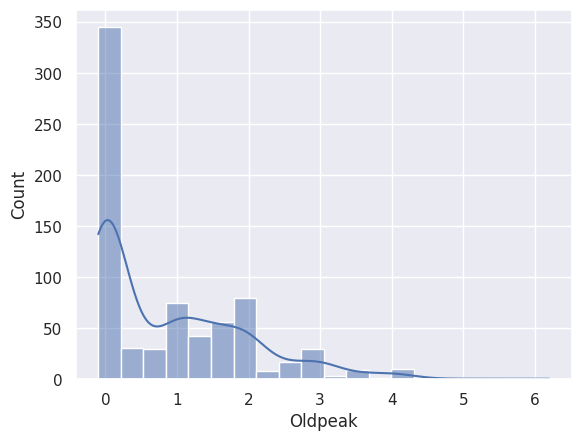

,Oldpeak
count,741.000000
mean,0.900000
std,1.073413
min,-0.100000
25%,0.000000
50%,0.500000
75%,1.500000
max,6.200000


In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=df, x='Oldpeak', kde=True)
plt.show()
df[['Oldpeak']].describe()

Berdasarkan output di atas dapat dilihat bahwa grafik histogram pada variabel Oldpeak cenderung berdistribusi normal, dan dapat dilihat terdapat outlier yaitu pasien dengan Oldpeak kurang dari 0. Hal tersebut diasumsikan bahwa tidak ada orang yang memiliki oldpeak kurang dari 0. Diasumsikan bahwa hal tersebut merupakan noise dan akan dilakukan drop baris.

In [ ]:
df = df.drop(df[df['Oldpeak']<0].index)
print(df.shape)
df.head(5)

(740, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHRBaru,RestingECGBaru,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


1.  Check Noise berdasarkan Deskriptif Statistik dan visualisai untuk setiap variabel numerik, diperoleh bahwa ada noise yang terlihat karena "count/jumlah" tidak sesuai dengan data awal. Ada beberapa variabel yang memiliki nilai null, yaitu 'Age' dengan 7 nilai null dan 'Sex' dengan 10 nilai null. Variabel ini akan ditangani dengan missing value nanti.
   - Beberapa variabel memiliki nilai minimum yang tampaknya tidak mungkin berdasarkan data knowledge (misalnya, 'Age', 'RestingBP', Oldpeak dan 'Cholesterol'), yang mungkin menunjukkan adanya data yang hilang atau kesalahan entri.
2.  Check Noise berdasarkan seleksi variabel untuk setiap variabel kategorik ketika diperhatikan setiap barisnya dengan data understanding, diperoleh bahwa pada variabel "Sex" terdapat noise kata yg tidak beraturan yaitu "nan", maka *saya asumsikan sebagai missing value* maka direplace agar sesuai dengan kaidah bahasa python. Namun untuk validasi di dunia industri akan saya konfirmasi terlebih dahulu ke atasan terkait data ini

## Check Duplikasi Data
##<center><h1><strong><font color="blue">(EDA): Memeriksa Duplikasi</font></strong></h1></center>


In [ ]:
print(df.shape)
print("jumlah data yang duplikat", df.duplicated().sum())
df[df.duplicated() == True]

(740, 12)
jumlah data yang duplikat 0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHRBaru,RestingECGBaru,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


Tidak terdapat duplikasi pada data ini

## Memeriksa Outlier
##<center><h1><strong><font color="blue">(EDA): Memeriksa Outlier (Univariate)</font></strong></h1></center>

### Distribusi Variabel Kategorik

In [ ]:
import numpy as np

In [ ]:
# Visual Python: Visualization > Seaborn
def vp_seaborn_show_values(axs, precision=1, space=0.01):
    pstr = '{:.' + str(precision) + 'f}'

    def _single(ax):
        # check orient
        orient = 'v'
        if len(ax.patches) == 1:
            # check if 0
            if ax.patches[0].get_x() == 0:
                orient = 'h'
        else:
            # compare 0, 1 patches
            p0 = ax.patches[0]
            p1 = ax.patches[1]
            if p0.get_x() == p1.get_x():
                orient = 'h'

        if orient == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*space)
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_height())
                    ax.text(_x, _y, value, ha='center')
        elif orient == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + (space - 0.01)
                _y = p.get_y() + p.get_height() / 2
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_width())
                    ax.text(_x, _y, value, ha='left')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

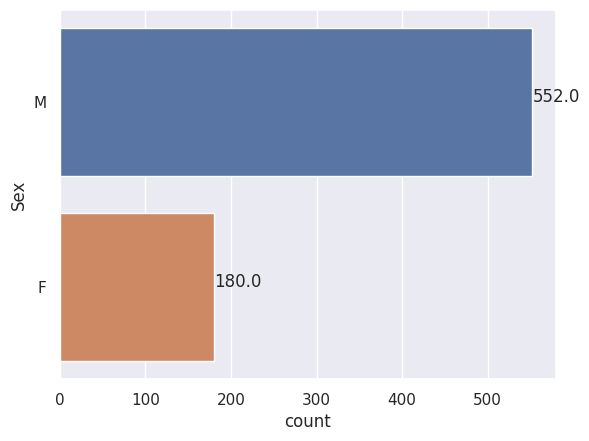

In [ ]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=df, y='Sex', order=df['Sex'].value_counts(ascending=False).index)
vp_seaborn_show_values(ax)
plt.show()

Hasil dari plot di atas menunjukkan bahwa kecenderungan pasien yang menderita penyakit jantung berjenis kelamin pria. Pada dataset yang digunakan, proporsi pasien pria yang memiliki heart disease jumlahnya lebih tinggi dibandingkan dengan pasien perempuan

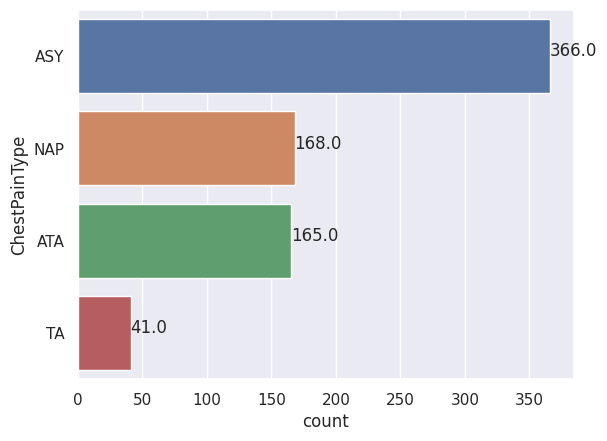

In [ ]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=df, y='ChestPainType', order=df['ChestPainType'].value_counts(ascending=False).index)
vp_seaborn_show_values(ax)
plt.show()

Hasil dari plot di atas menunjukkan bahwa mayoritas pasien yang menderita penyakit jantung cenderung mengalami tipe nyeri dada Angina Pectoris (ASY)

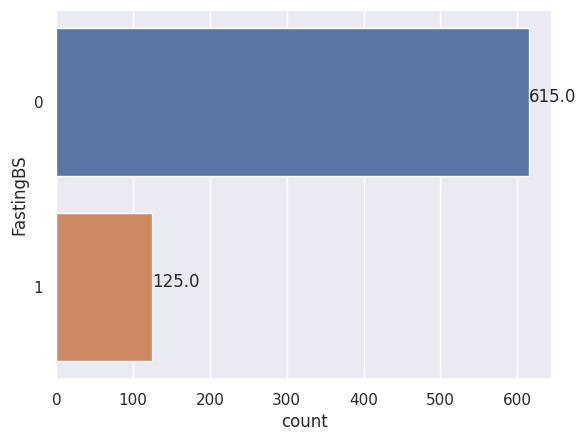

In [ ]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=df, y='FastingBS')
vp_seaborn_show_values(ax)
plt.show()

Hasil dari plot di atas menunjukkan bahwa kecenderungan mayoritas pasien yang menderita penyakit jantung memiliki gula darah puasa kurang dari 120 mg/dl. Hal ini diasumsikan valid karena berdasarkan domain knowledge pasien dinilai normal jika masih di bawah 100 mg/dl.

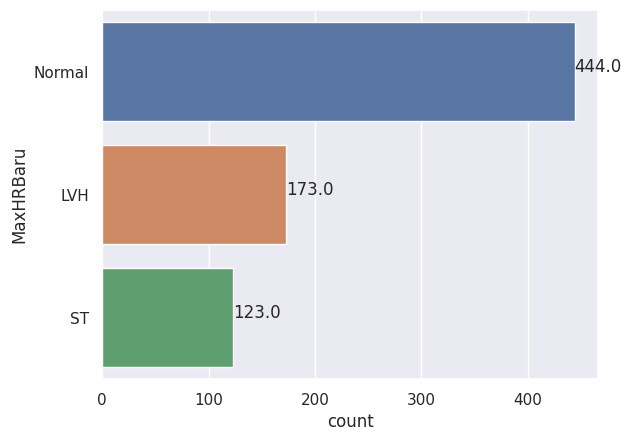

In [ ]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=df, y='MaxHRBaru', order=df['MaxHRBaru'].value_counts(ascending=False).index)
vp_seaborn_show_values(ax)
plt.show()

Hasil dari plot di atas menunjukkan bahwa kecenderungan mayoritas detak jantung maksimum tercapai dari pasien yang menderita penyakit jantung adalah normal.

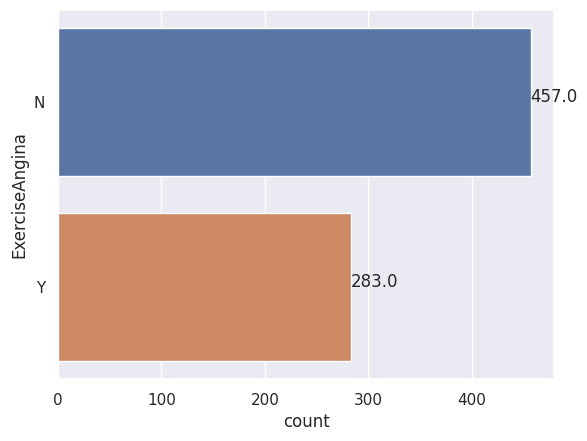

In [ ]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=df, y='ExerciseAngina', order=df['ExerciseAngina'].value_counts(ascending=False).index)
vp_seaborn_show_values(ax)
plt.show()

Hasil dari plot di atas menunjukkan bahwa kecenderungan mayoritas dari pasien yang menderita penyakit jantung adalah N.

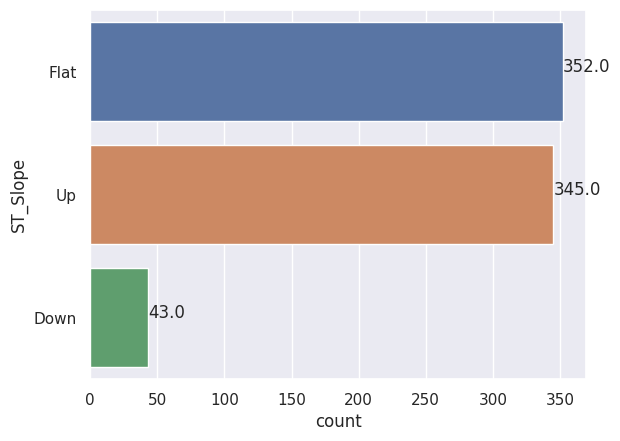

In [ ]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=df, y='ST_Slope', order=df['ST_Slope'].value_counts(ascending=False).index)
vp_seaborn_show_values(ax)
plt.show()

Hasil dari plot di atas menunjukkan bahwa kecenderungan mayoritas kemiringan puncak latihan segmen ST dari pasien yang menderita penyakit jantung adalah Flat.

### Distribusi Variabel Numerik

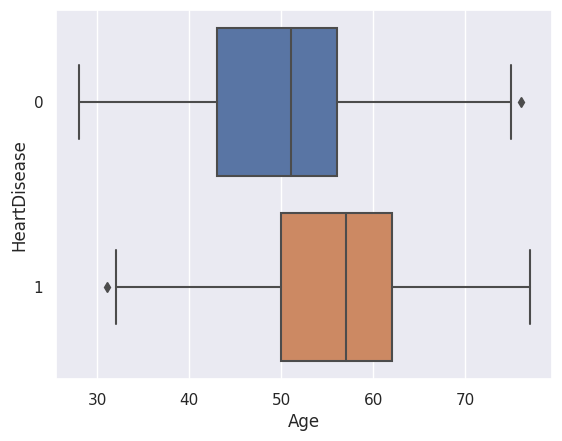

In [ ]:
# Visual Python: Visualization > Seaborn
sns.boxplot(data=df, x='Age', y='HeartDisease')
plt.show()

Dari hasil boxplot di atas terdapat outlier. Akan tetapi, outlier tersebut tidak terlalu banyak atau terlalu extreme sehingga diasumsikan bahwa outlier tersebut normal ada pada data.

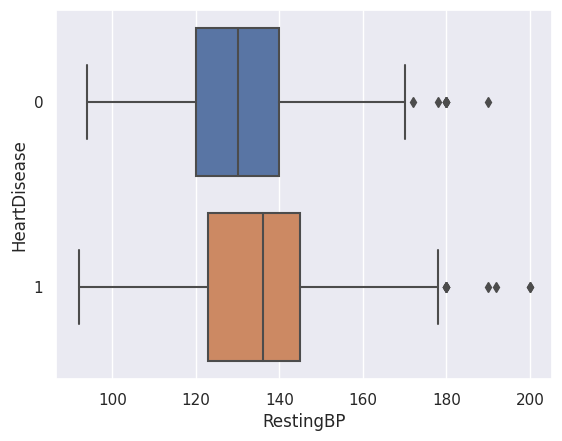

In [ ]:
# Visual Python: Visualization > Seaborn
sns.boxplot(data=df, x='RestingBP', y='HeartDisease')
plt.show()

Dari hasil boxplot di atas terdapat extreme outlier yang cukup banyak. Outlier dapat memengaruhi hasil analisis secara keseluruhan. Oleh karena itu, diperlukan penanganan untuk mengatasi outlier dengan melakukan proses filtering.

Q1=120.0, Q3=140.0, IQR=20.0


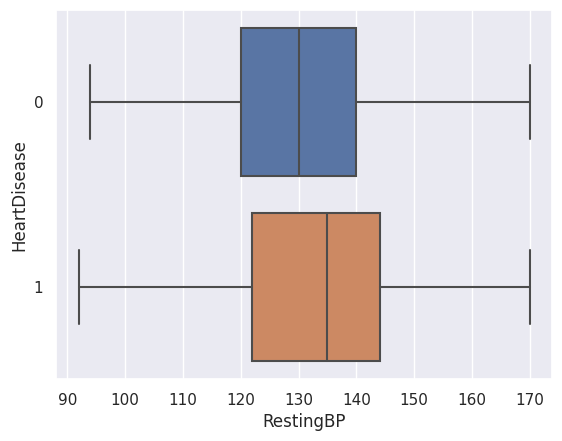

((720, 12), (740, 12))

In [ ]:
Q1 = df['RestingBP'].quantile(0.25)
Q3 = df['RestingBP'].quantile(0.75)
IQR = Q3 - Q1
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

DfNoOutliers = df.drop(df[(df.RestingBP < Q1-1.5*IQR) | (df.RestingBP > Q3+1.5*IQR)].index)
p = sns.boxplot(x="RestingBP", y="HeartDisease", data=DfNoOutliers)
plt.show()
DfNoOutliers.shape, df.shape

Setelah dilakukan proses filtering pada variabel RestingBP, terlihat bahwa sudah tidak ada outlier

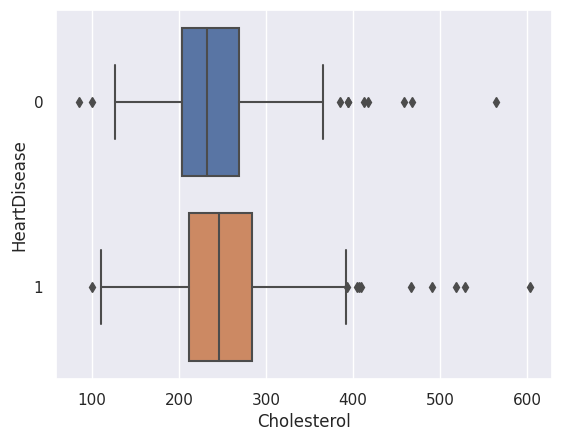

In [ ]:
# Visual Python: Visualization > Seaborn
sns.boxplot(data=df, x='Cholesterol', y='HeartDisease')
plt.show()

Dari hasil boxplot di atas terdapat outlier yang cukup banyak. Outlier dapat memengaruhi hasil analisis secara keseluruhan. Oleh karena itu, diperlukan penanganan untuk mengatasi outlier dengan melakukan proses filtering.

Q1=207.75, Q3=275.25, IQR=67.5


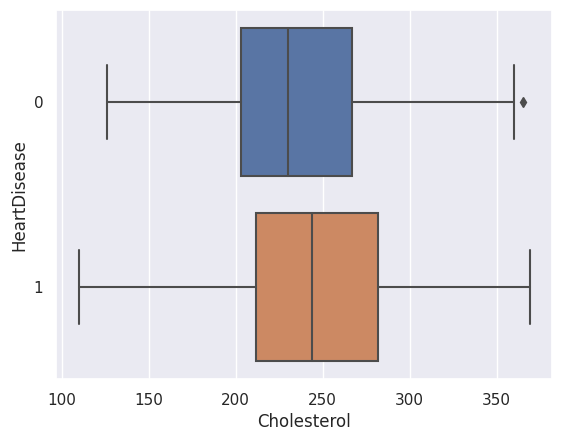

((717, 12), (740, 12))

In [ ]:
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

DfNoOutliers = df.drop(df[(df.Cholesterol < Q1-1.5*IQR) | (df.Cholesterol > Q3+1.5*IQR)].index)
p = sns.boxplot(x="Cholesterol", y="HeartDisease", data=DfNoOutliers)
plt.show()
DfNoOutliers.shape, df.shape

Setelah dilakukan proses filtering pada variabel Cholesterol, terlihat bahwa sudah tidak ada outlier

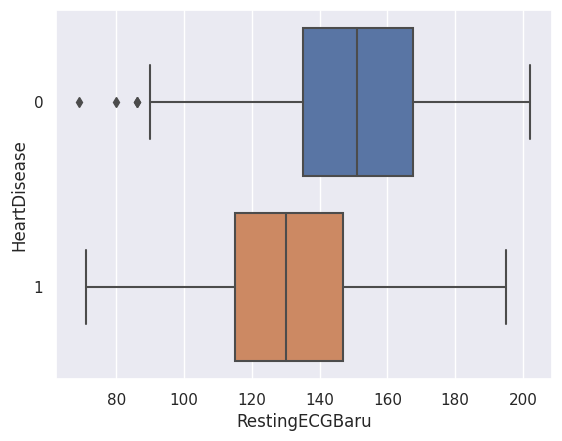

In [ ]:
# Visual Python: Visualization > Seaborn
sns.boxplot(data=df, x='RestingECGBaru', y='HeartDisease')
plt.show()

Dari hasil boxplot di atas terdapat extreme outlier yang cukup banyak. Outlier dapat memengaruhi hasil analisis secara keseluruhan. Oleh karena itu, diperlukan penanganan untuk mengatasi outlier dengan melakukan proses filtering.

Q1=122.0, Q3=160.0, IQR=38.0


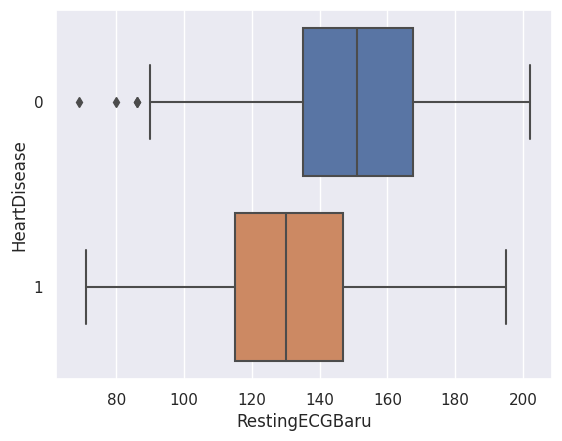

((740, 12), (740, 12))

In [ ]:
Q1 = df['RestingECGBaru'].quantile(0.25)
Q3 = df['RestingECGBaru'].quantile(0.75)
IQR = Q3 - Q1
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

DfNoOutliers = df.drop(df[(df.RestingECGBaru < Q1-1.5*IQR) | (df.RestingECGBaru > Q3+1.5*IQR)].index)
p = sns.boxplot(x="RestingECGBaru", y="HeartDisease", data=DfNoOutliers)
plt.show()
DfNoOutliers.shape, df.shape

Setelah dilakukan proses filtering pada variabel RestingECGBaru, terlihat bahwa outlier cenderung tetap ada sehingga diasumsikan bahwa outlier tersebut normal ada pada data.

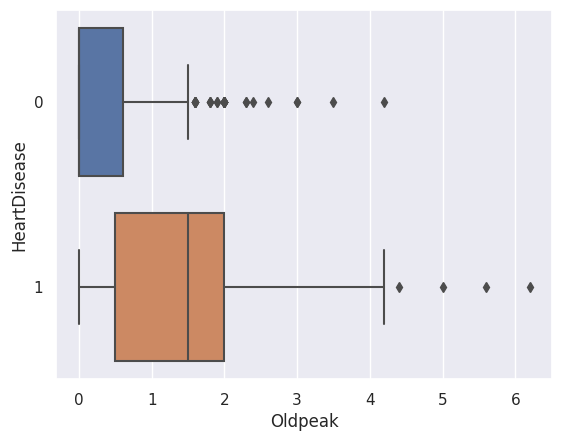

In [ ]:
# Visual Python: Visualization > Seaborn
sns.boxplot(data=df, x='Oldpeak', y='HeartDisease')
plt.show()

Dari hasil boxplot di atas terdapat extreme outlier yang cukup banyak. Outlier dapat memengaruhi hasil analisis secara keseluruhan. Oleh karena itu, diperlukan penanganan untuk mengatasi outlier dengan melakukan proses filtering.

Q1=0.0, Q3=1.5, IQR=1.5


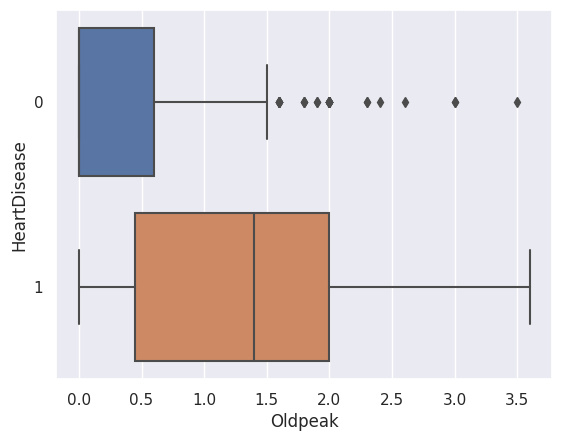

((725, 12), (740, 12))

In [ ]:
Q1 = df['Oldpeak'].quantile(0.25)
Q3 = df['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

DfNoOutliers = df.drop(df[(df.Oldpeak < Q1-1.5*IQR) | (df.Oldpeak > Q3+1.5*IQR)].index)
p = sns.boxplot(x="Oldpeak", y="HeartDisease", data=DfNoOutliers)
plt.show()
DfNoOutliers.shape, df.shape

Setelah dilakukan proses filtering pada variabel Oldpeak, terlihat bahwa outlier cenderung tetap ada sehingga diasumsikan bahwa outlier tersebut normal ada pada data.

### <h2><strong><font color="red"> (EDA): Memeriksa Outlier (Univariate) </font></strong></h1></center>

*Outlier adalah data yang valid, di dunia industri **wajib** dikonfirmasikan terlebih dahulu ke atasan atau data engineering.*

1.  Check outlier berdasarkan visualisasi seaborn untuk setiap variabel kategorik, diperoleh bahwa dengan saya **asumsikan** tidak ada outlier karena tidak ada outlier yang terlalu extreme di variabel kategorik, maka tidak perlu penanganan lebih lanjut agar nantinya model tetap akan mencerminkan data yang sesuai terjadi di dunia nyata.

2.  Check outlier berdasarkan visualisasi boxplot untuk setiap variabel numerik, diperoleh bahwa dengan saya **asumsikan** ada outlier, maka difilter menggunakan quartile.

#<center><h1><strong><font color="blue">4. Menentukan Objek Data</font></strong></h1></center>
    

In [ ]:
# Menampilkan jumlah baris dan kolom
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

# Menampilkan nama kolom
print("Nama kolom:", df.columns.tolist())


Jumlah baris: 740
Jumlah kolom: 12
Nama kolom: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHRBaru', 'RestingECGBaru', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


In [ ]:
# melihat korelasi diantara variabel prediktor
df.corr()

,Age,RestingBP,Cholesterol,RestingECGBaru,Oldpeak
Age,1.000000,0.261750,0.057341,-0.380252,0.282500
RestingBP,0.261750,1.000000,0.094663,-0.126919,0.202309
Cholesterol,0.057341,0.094663,1.000000,-0.020690,0.057546
RestingECGBaru,-0.380252,-0.126919,-0.020690,1.000000,-0.257728
Oldpeak,0.282500,0.202309,0.057546,-0.257728,1.000000


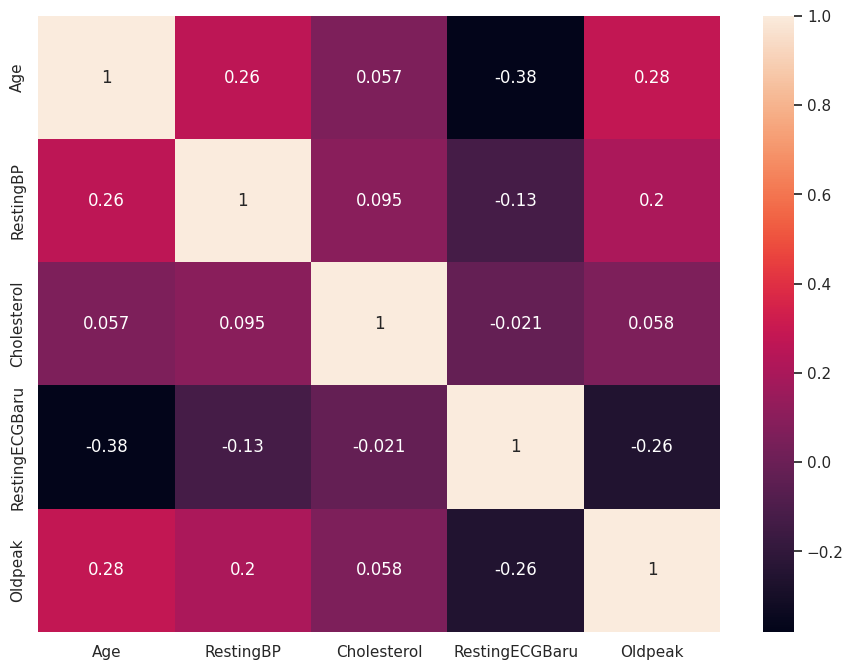

In [ ]:
# matriks korelasi
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

- Nilai korelasi positif menunjukkan hubungan positif antar variabel, sedangkan nilai korelasi negatif menunjukkan hubungan negatif.
- Jika nilai korelasi mendekati 1, variabel tersebut memiliki hubungan positif yang kuat. Jika mendekati -1, variabel tersebut memiliki hubungan negatif yang kuat.
Misalnya,  bahwa variabel "Age" dan "RestingBP" memiliki nilai korelasi positif yang tinggi, itu bisa berarti bahwa semakin tua usia seseorang, tekanan darah istirahatnya cenderung lebih tinggi.

#<center><h1><strong><font color="blue">5. Membersihkan data</font></strong></h1></center>
    

## Missing Value
##<center><h1><strong><font color="blue"> (EDA): Missing Values</font></strong></h1></center>
    


In [ ]:
print(df.isnull().sum())

Age               7
Sex               8
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
MaxHRBaru         0
RestingECGBaru    0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
(df.isnull().sum()/len(df)*100).to_frame('persentase missing')

,persentase missing
Age,0.945946
Sex,1.081081
ChestPainType,0.000000
RestingBP,0.000000
Cholesterol,0.000000
FastingBS,0.000000
MaxHRBaru,0.000000
RestingECGBaru,0.000000
ExerciseAngina,0.000000
Oldpeak,0.000000


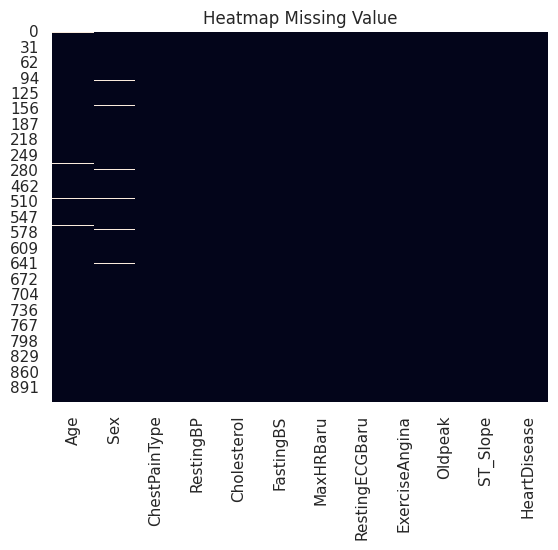

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

Dapat dilihat bahwa terdapat missing value pada
- variabel Age sebanyak 7 dan
- variabel Sex sebanyak 8.

Untuk memastikan keakuratan dalam analisis data, dikarenakan memiliki presentase yang kecil sehingga akan dilakukan penghapusan missing value dari data  dengan cara menghapus baris yang mengandung missing value.

In [ ]:
X = df.dropna()
print(df.shape, X.shape)
X.head()

(740, 12) (726, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHRBaru,RestingECGBaru,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39.0,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [ ]:
print(X.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
MaxHRBaru         0
RestingECGBaru    0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Setelah dilakukan penghapusan missing value menggunakan fungsi dropna(), terlihat sudah tidak ada missing value pada data. Proses ini penting dilakukan agar interpretasi hasil analisis menjadi lebih lengkap.

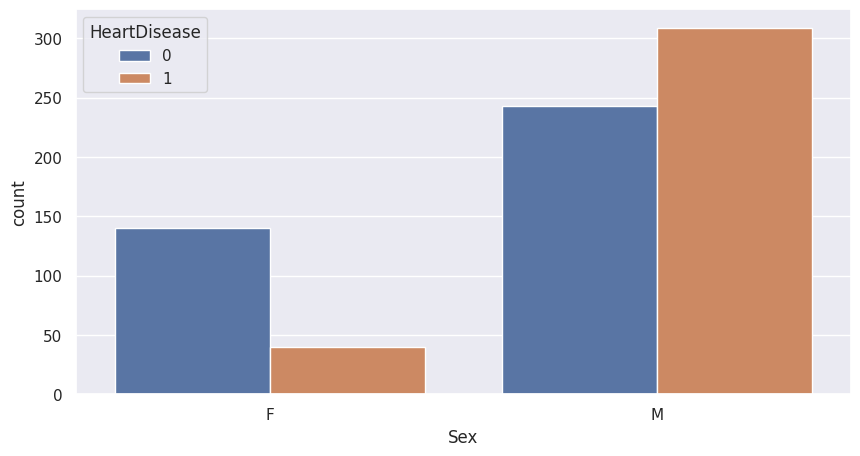

In [ ]:
#melihat relasi data
# Visual Python: Visualization > Seaborn
plt.figure(figsize=(10,5))

sns.countplot(data=df, x='Sex', hue='HeartDisease')
plt.show()

#<center><h1><strong><font color="blue">6. Mengkonstruksi Data</font></strong></h1></center>

## Transformasi

### One Hot-Encoding
Untuk meningkatkan kemampuan model dalam mengolah dan menganalisis data kategorik, akan dilakukan transformasi data menggunakan teknik One-Hot Encoding.

In [ ]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHRBaru,RestingECGBaru,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39.0,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68.0,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57.0,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57.0,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
print(X.shape)
for col in catVar.columns:
    if col != 'HeartDisease':
        transformasi = pd.get_dummies(X[col], prefix='')
        X = pd.concat([X, transformasi], axis = 1)
        try:
            X.drop([col], axis=1, inplace=True)
        except Exception as err_:
            print(err_)
print(X.shape)
X.head()

(726, 12)
(726, 22)


,Age,RestingBP,Cholesterol,RestingECGBaru,Oldpeak,HeartDisease,_F,_M,_ASY,_ATA,...,_0,_1,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
1,49.0,160,180,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37.0,130,283,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48.0,138,214,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54.0,150,195,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
5,39.0,120,339,170,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


Proses One-Hot Encoding ini berguna agar model dapat lebih efisien menangkap pola-pola yang terdapat dalam data dan meningkatkan kinerja model serta menghasilkan hasil yang lebih akurat.

## Menyimpan Hasil Preprocessed Data

In [ ]:
# Saving the preprocessed Data for future use/analysis
X.to_csv("data/heart_PreProcessed.csv", encoding='utf8', index=False)

                                             |          | [  0%]   00:00 -> (? left)


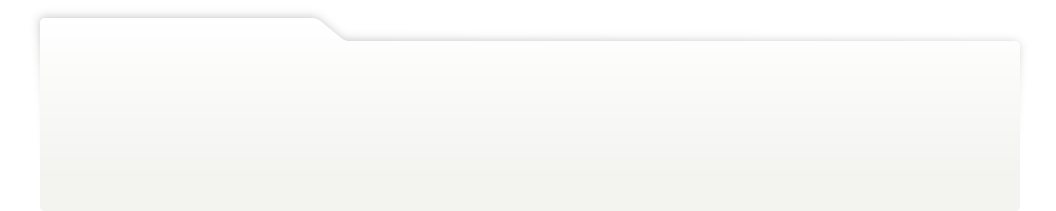
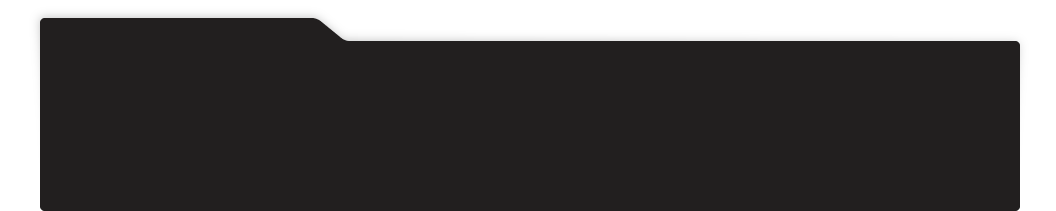
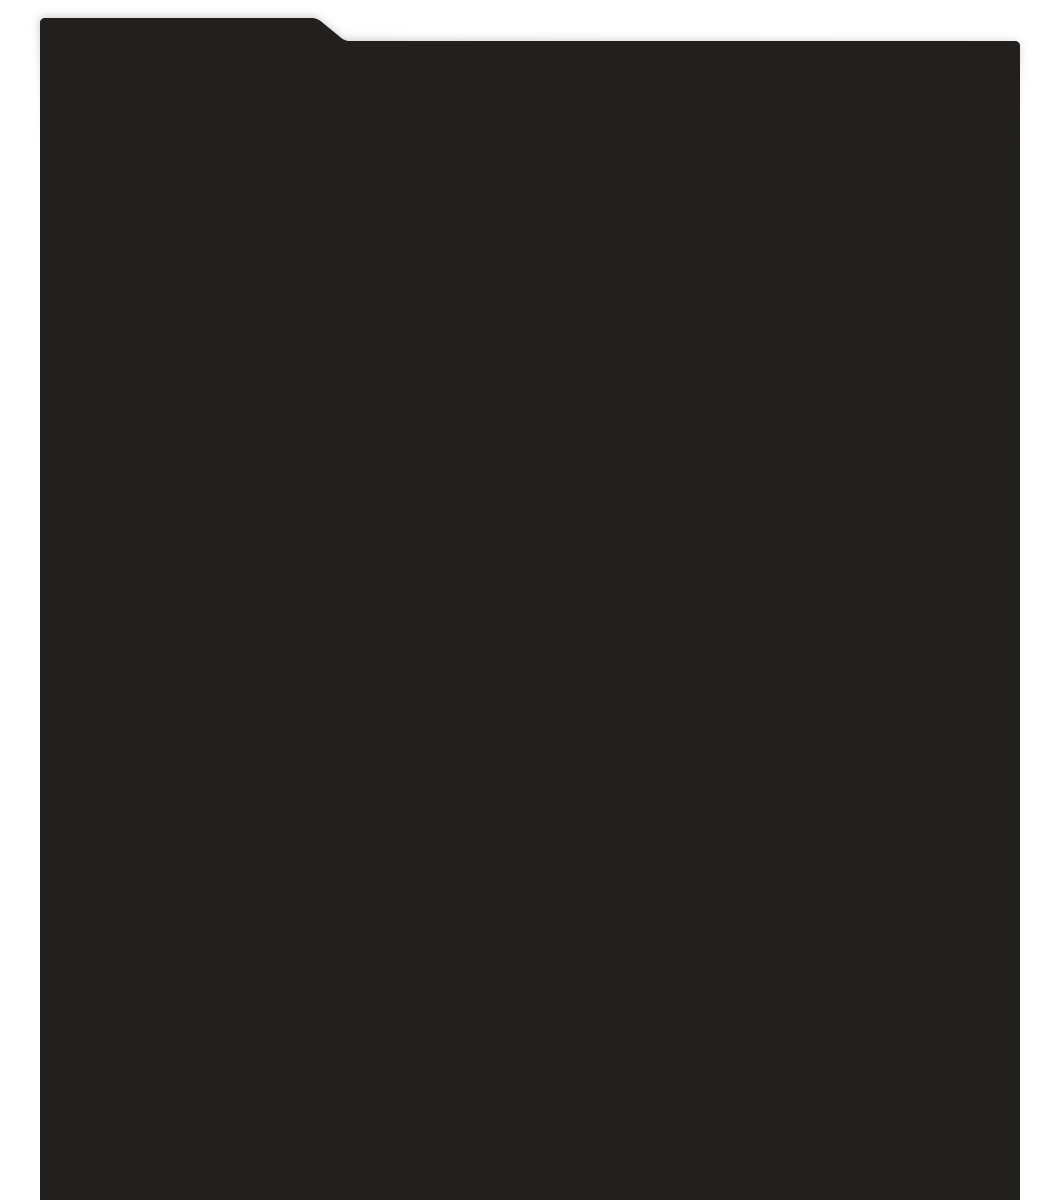
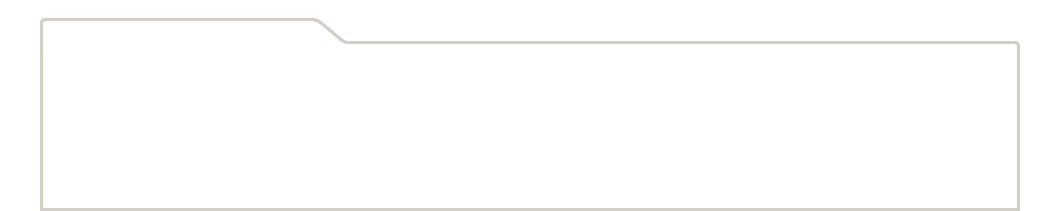
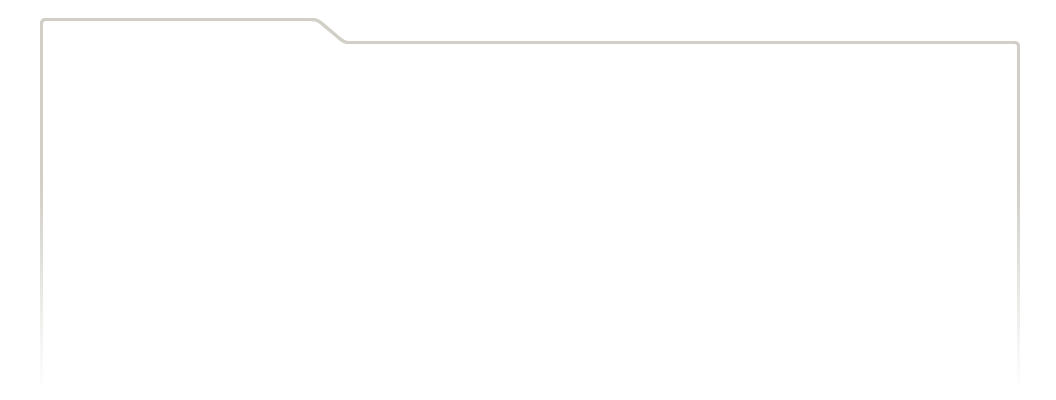
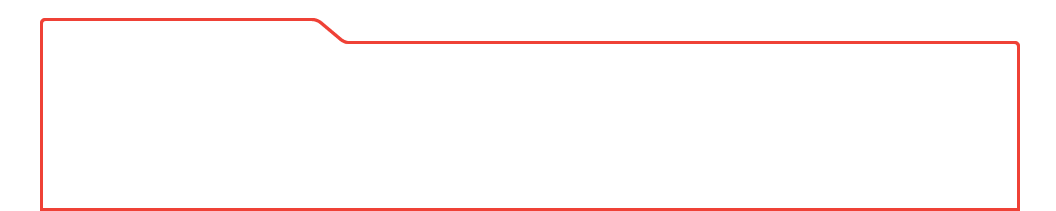
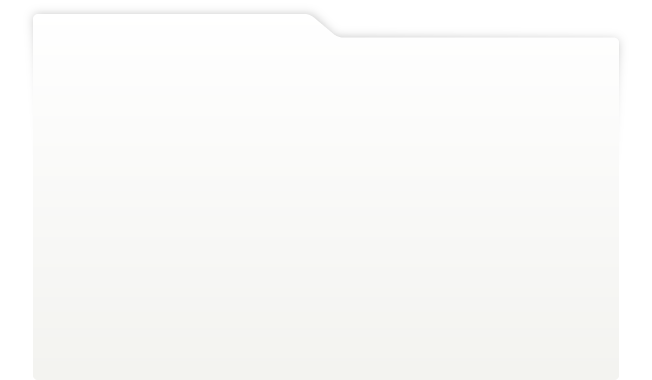
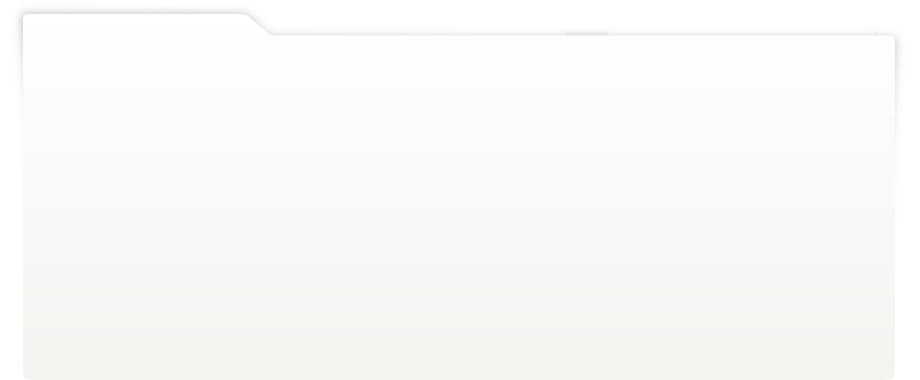
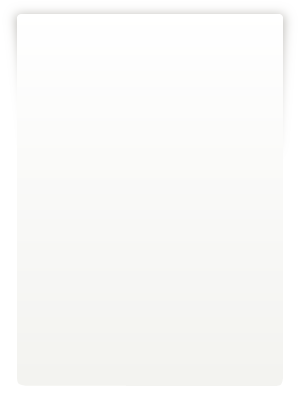
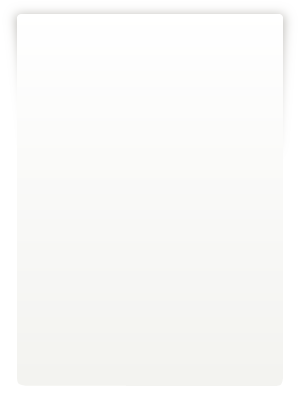
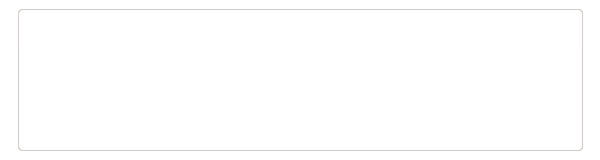
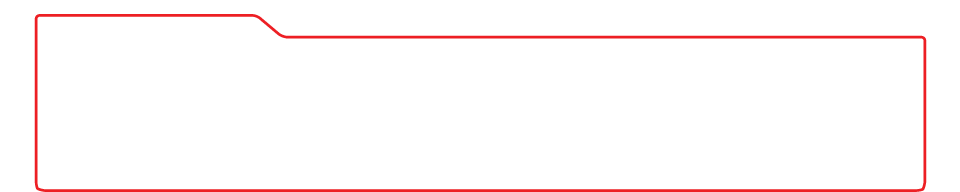
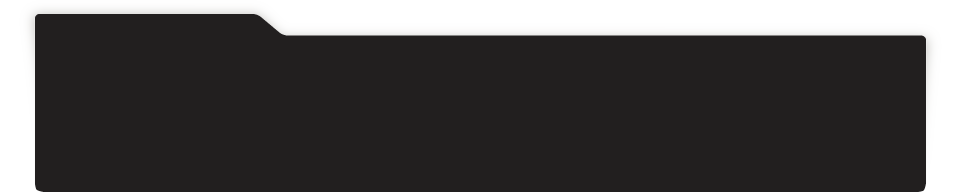
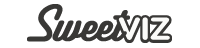
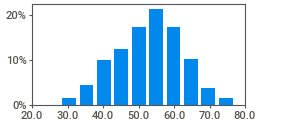
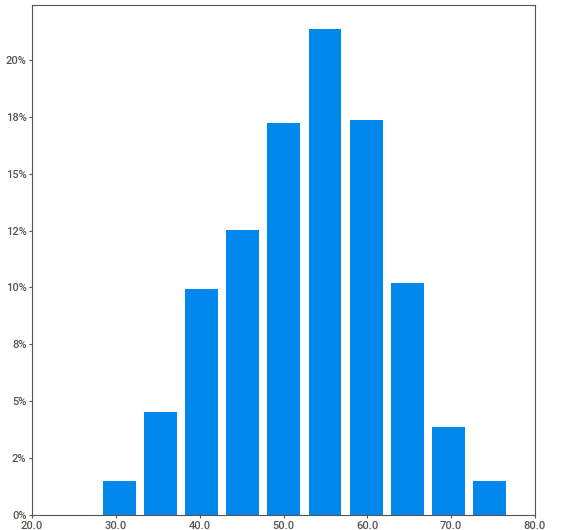
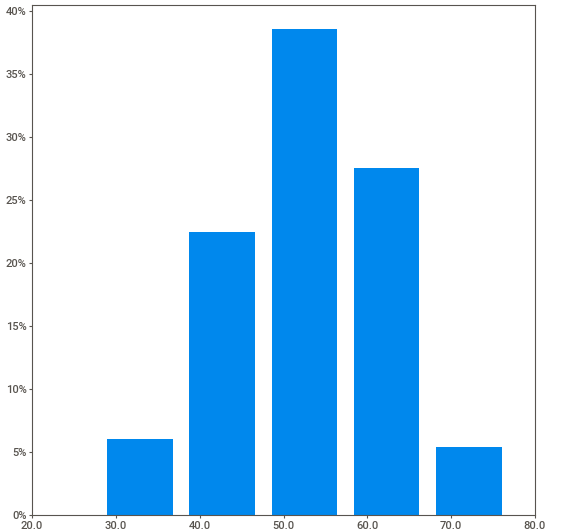
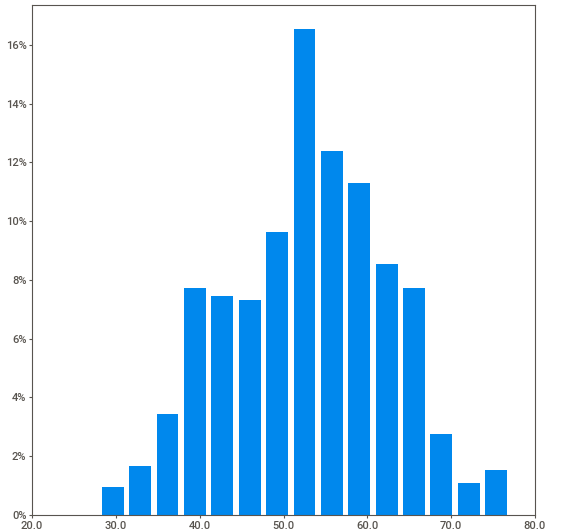
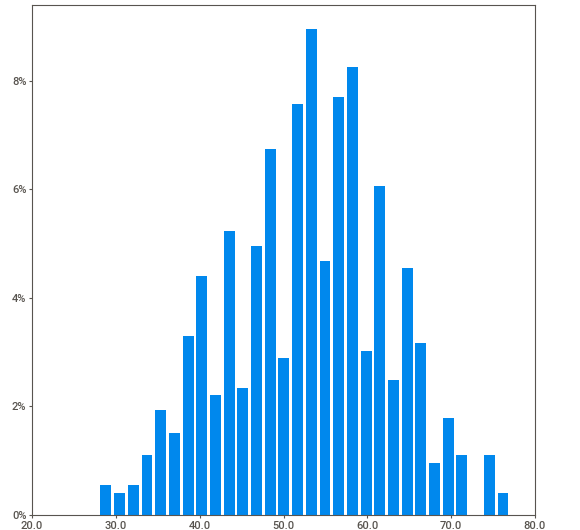
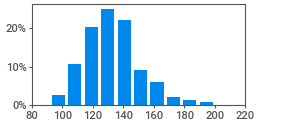
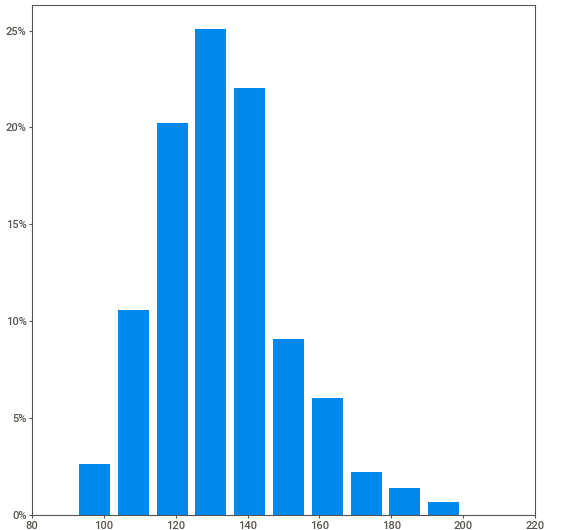
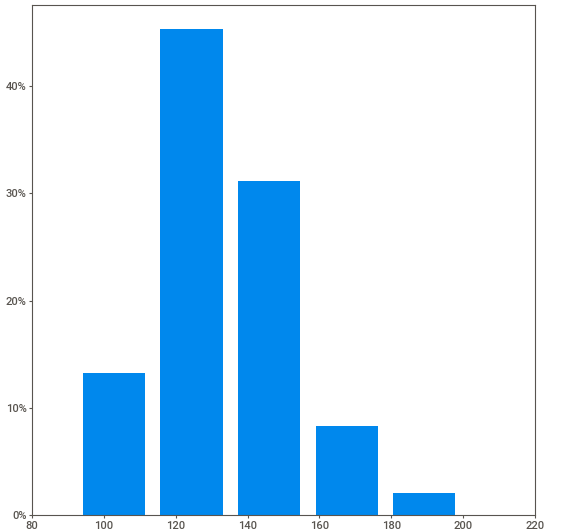
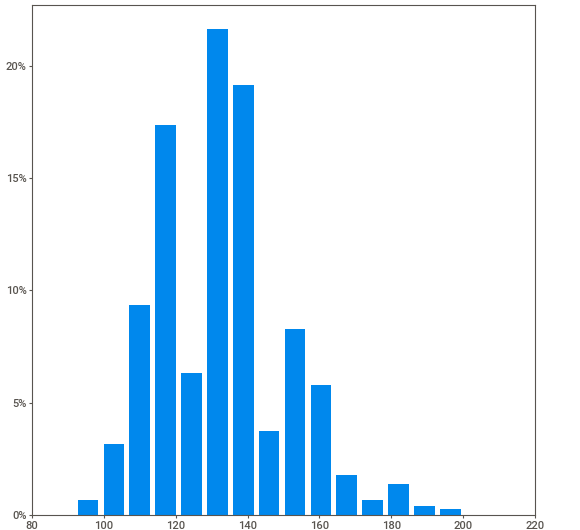
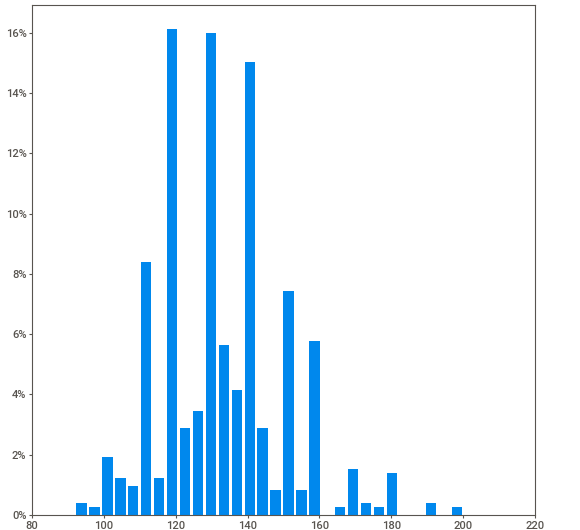
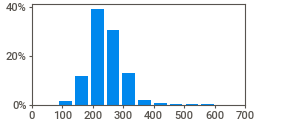
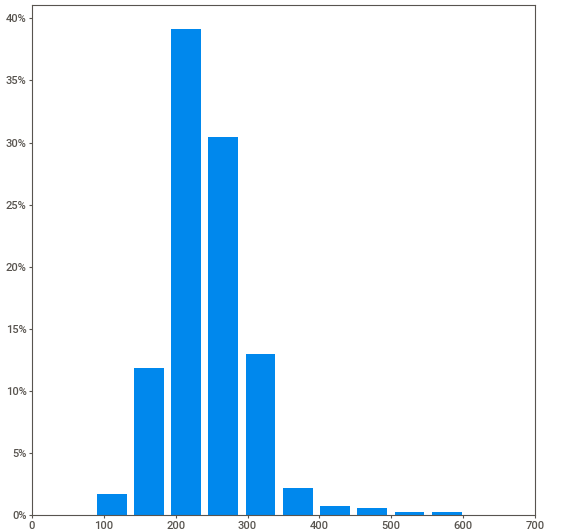
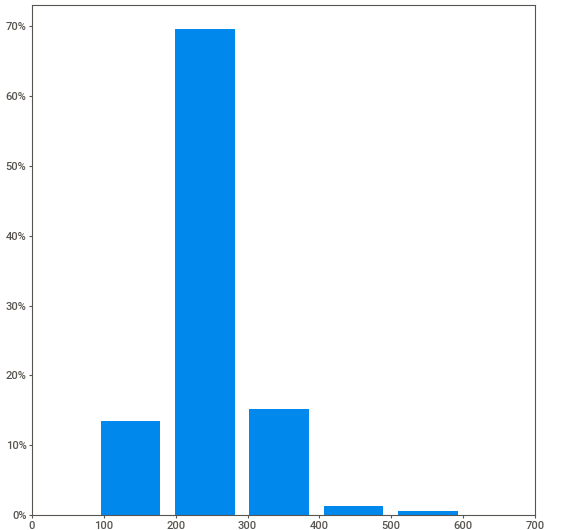
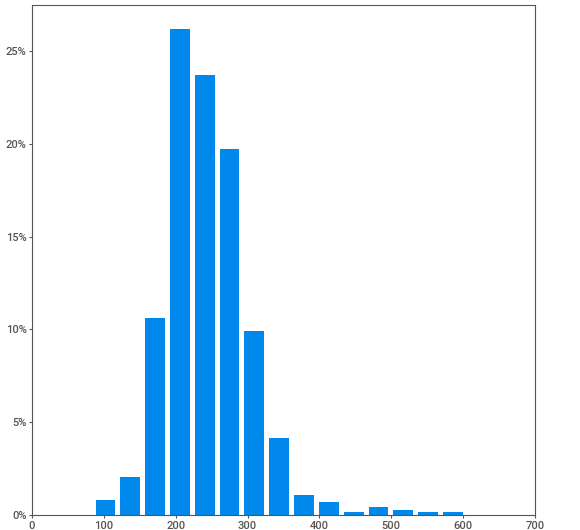
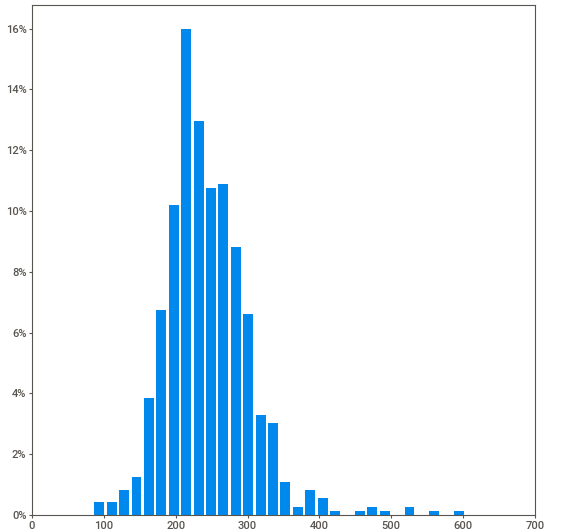
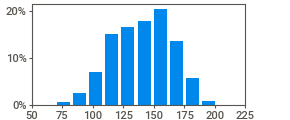
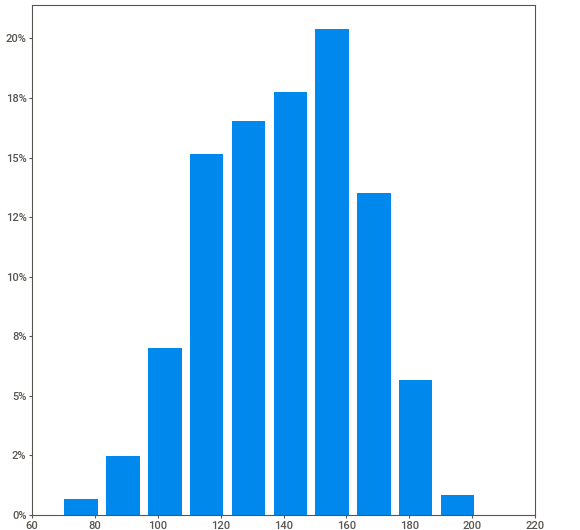
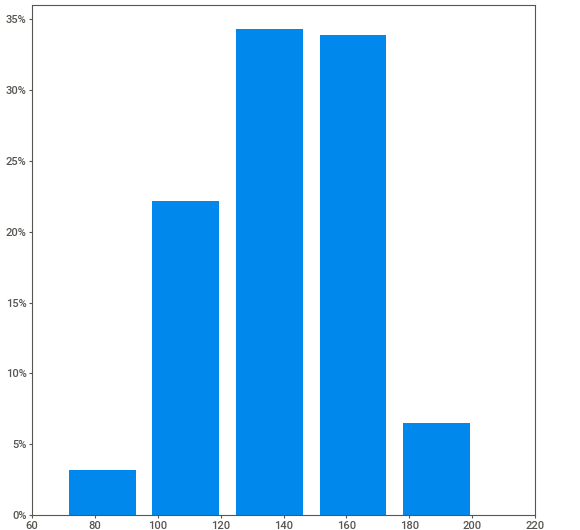
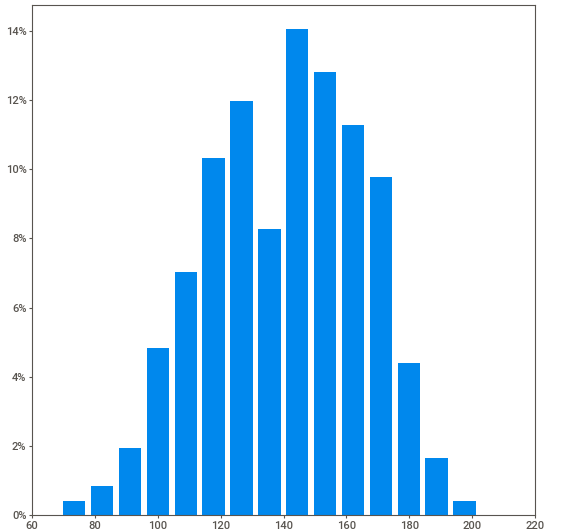
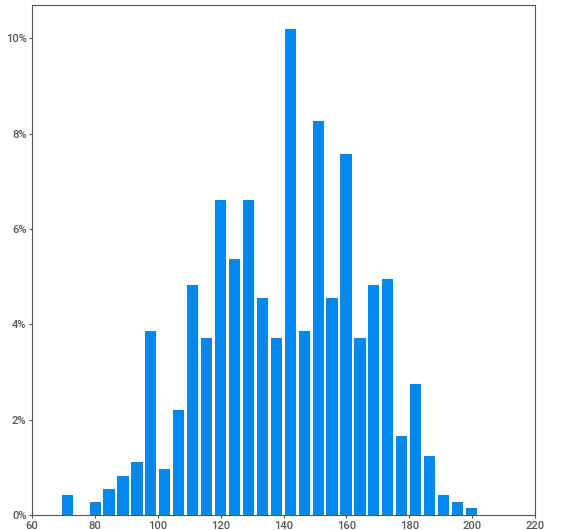
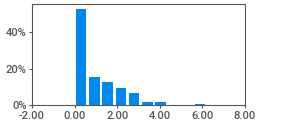
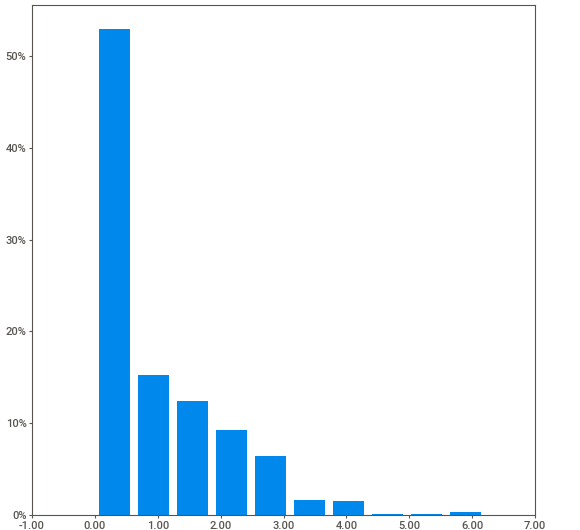
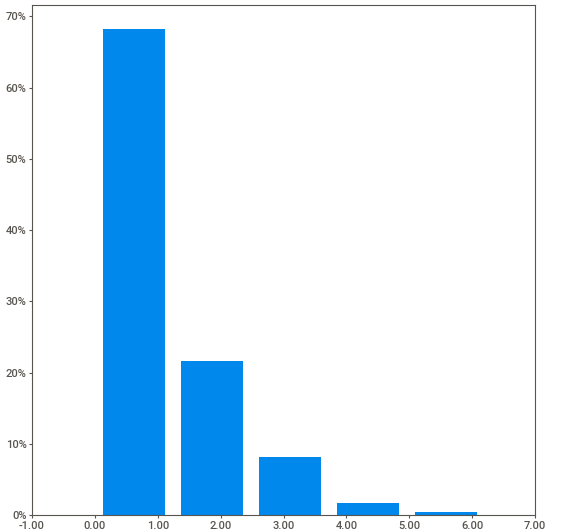
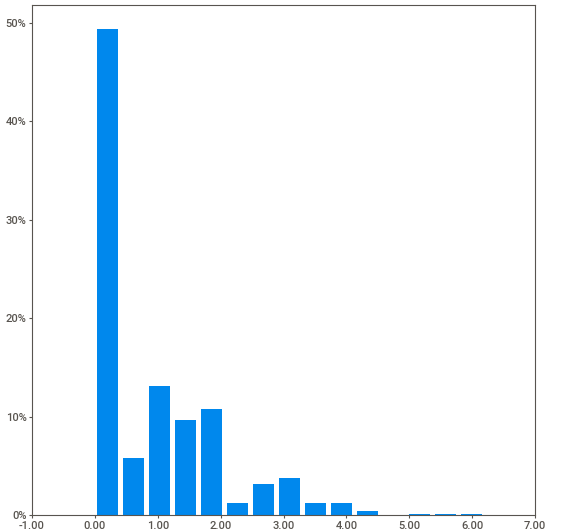
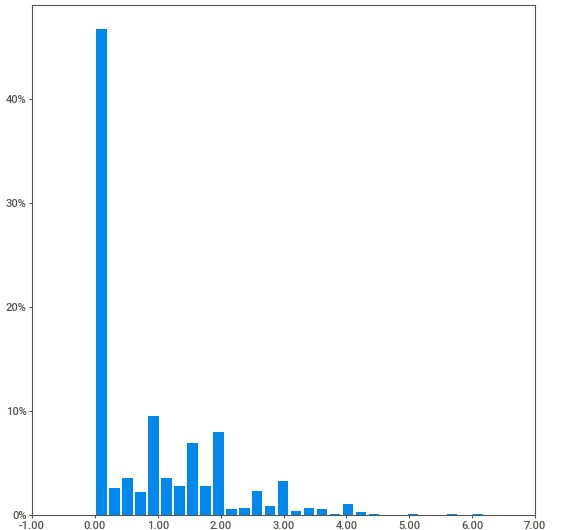
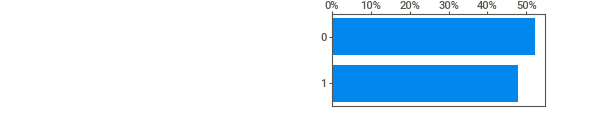
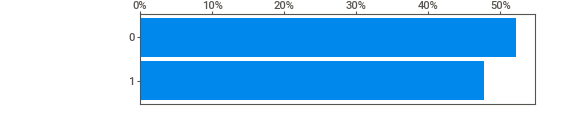
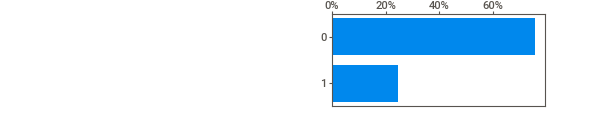
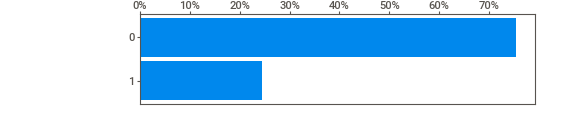
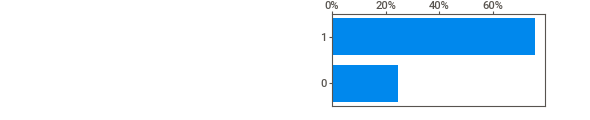
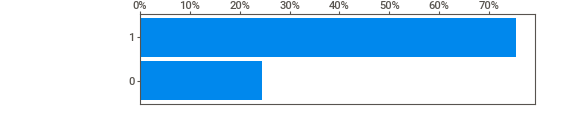
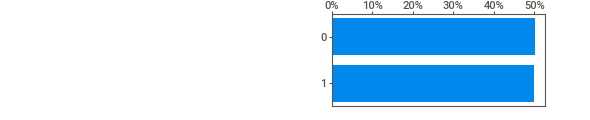
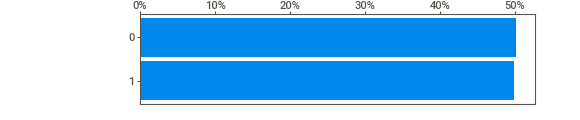
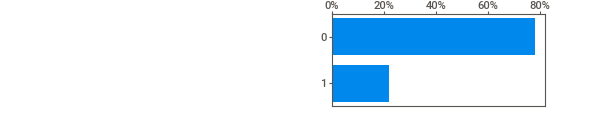
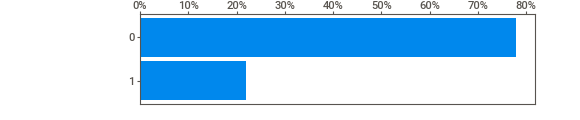
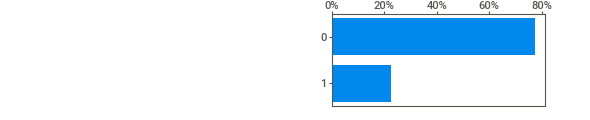
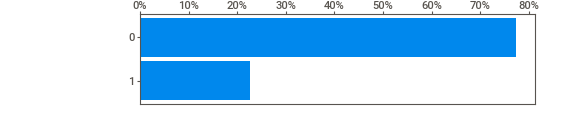
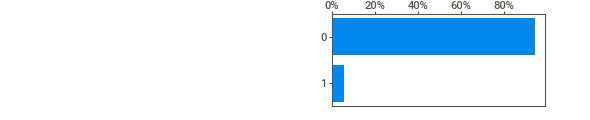
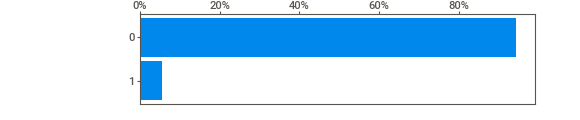
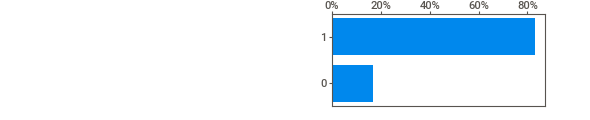
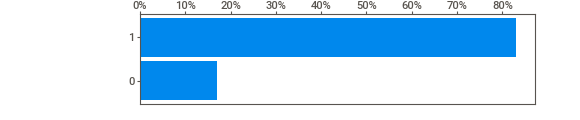
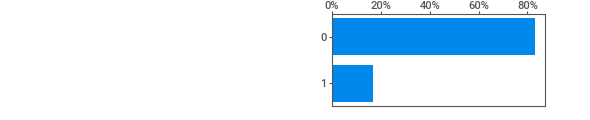
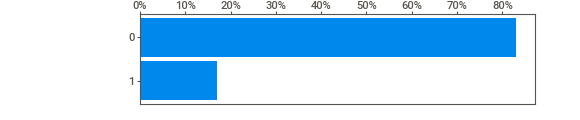
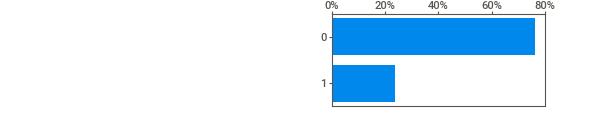
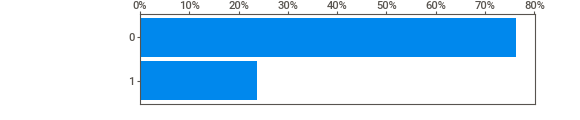
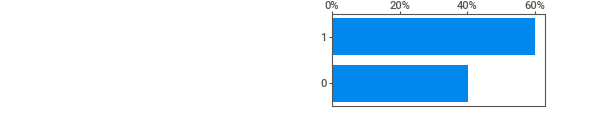
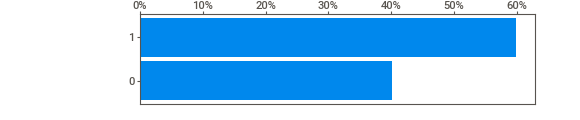
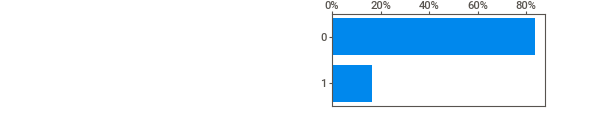
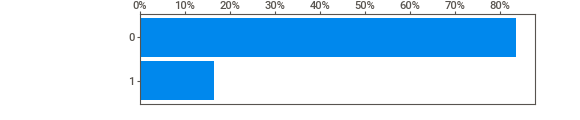
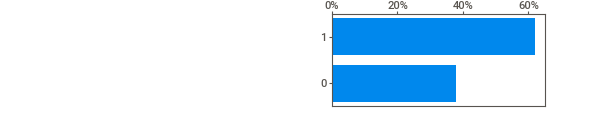
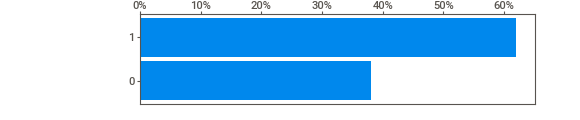
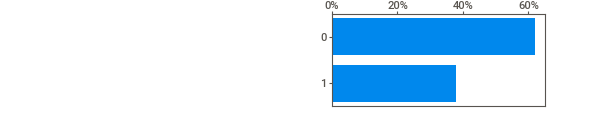
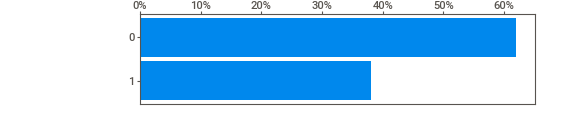
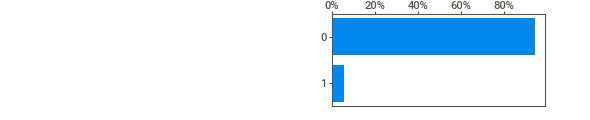
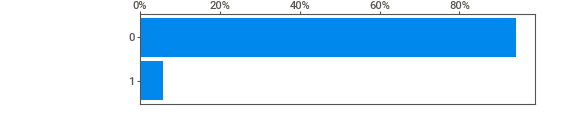
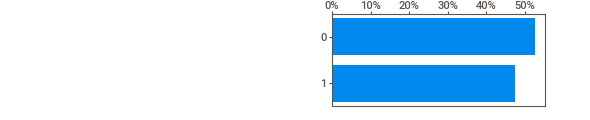
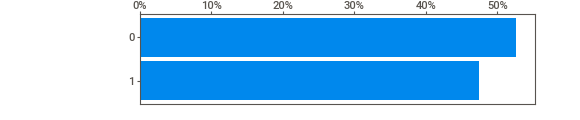
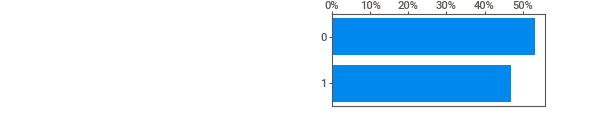
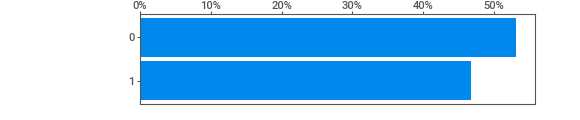
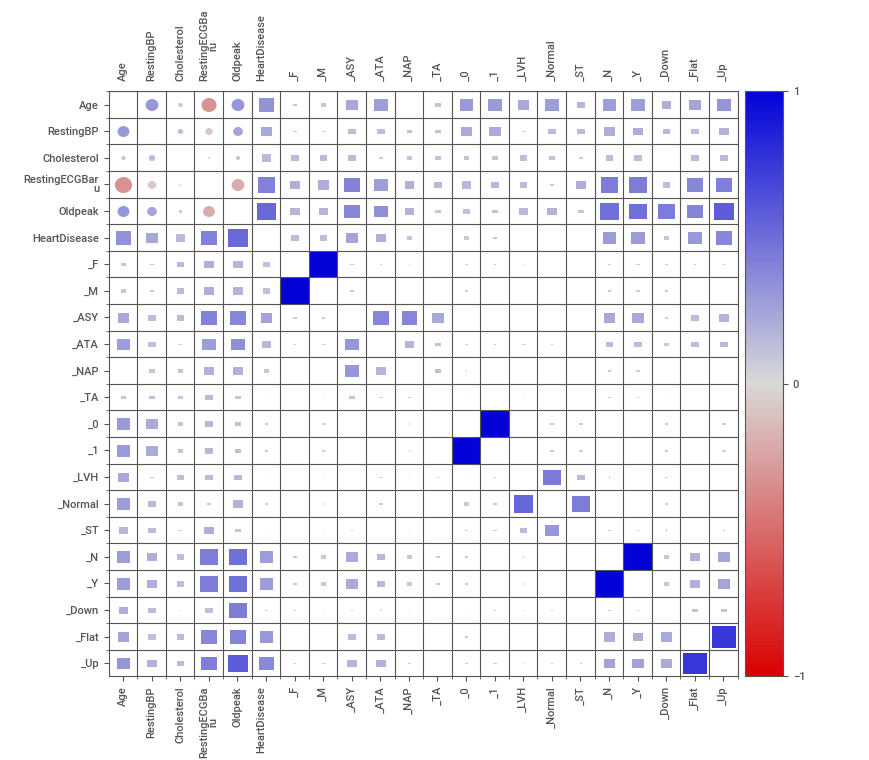
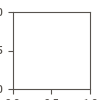

In [ ]:
#report EDA
# Visual Python: Data Analysis > Sweetviz
report = sweetviz.analyze([X, 'laporan data'])
report.show_notebook()
report

**Laporan Data**

**Tujuan**

Tujuan dari laporan ini adalah untuk memahami karakteristik data dan menemukan pola atau tren yang signifikan.

**Pola**

Berdasarkan output yang diberikan, dapat disimpulkan bahwa faktor-faktor yang berpengaruh terhadap "HeartDisease" (penyakit jantung) adalah:

* **Faktor kategorikal:**
    * **ST_Slope (Kemiringan Segmen ST):** kemiringan puncak segmen St selama latihan yang bertipe "Up; naik", "Flat: Datar"
    * **ExerciseAngina (Angina Selama Latihan)**: Angina yang diinduksi oleh olahraga yang bertipe "N" dan "Y"
    * **ChestPainType (Tipe Nyeri Dada)**: Jenis nyeri dada yang dialami pasien yang bertipe (ATA: Atypical Angina, ASY: Asymptomatic).

* **Faktor numerik:**
    * **Oldpeak** memiliki korelasi yang signifikan dengan "HeartDisease", yang dapat diartikan bahwa tingkat depresi ST dapat menjadi indikator penting dalam diagnosis penyakit jantung.
    * **RestingECGBaru** dan **Age** juga memiliki korelasi yang cukup tinggi, menunjukkan bahwa hasil elektrokardiogram istirahat dan usia pasien dapat memberikan informasi yang berarti tentang penyakit jantung.
    * **"RestingBP** memiliki korelasi yang lebih rendah tetapi masih berkontribusi pada informasi HeartDisease.

**Rekomendasi**

Berdasarkan hasil eksplorasi data, berikut adalah beberapa rekomendasi yang dapat saya diberikan:

1. **Pemeriksaan Rutin**: Pasien yang memiliki gejala seperti nyeri dada atipikal atau asimptomatik, angina selama latihan, dan kemiringan segmen ST yang naik atau datar harus melakukan pemeriksaan rutin untuk penyakit jantung. Hal ini karena gejala-gejala tersebut memiliki korelasi yang signifikan dengan penyakit jantung.

2. **Pentingnya Pemeriksaan Fisik**: Faktor-faktor seperti depresi ST (Oldpeak), hasil elektrokardiogram istirahat (RestingECGBaru), usia, dan tekanan darah istirahat (RestingBP) juga memiliki korelasi dengan penyakit jantung. Oleh karena itu, penting bagi individu, terutama mereka yang berusia lanjut, untuk melakukan pemeriksaan fisik secara rutin.

3. **Pendidikan Kesehatan**: Mengingat bahwa tingkat pendidikan berpengaruh terhadap penghasilan, program pendidikan kesehatan harus ditujukan kepada individu dengan pendidikan rendah yang mungkin tidak memiliki akses yang cukup ke layanan kesehatan. Edukasi tentang gejala dan faktor risiko penyakit jantung dapat membantu mereka dalam mendeteksi penyakit lebih awal dan mencari perawatan yang tepat.

4. **Pengembangan Model Prediktif**: Untuk membantu dalam deteksi dini penyakit jantung, model prediktif seperti Decision Tree dan Regresi Logistik dapat dikembangkan menggunakan dataset ini. Model ini dapat digunakan oleh profesional kesehatan untuk memprediksi risiko penyakit jantung pada pasien berdasarkan gejala dan faktor risiko mereka.

#<center><h1><strong><font color="blue">7. Menentukan Label Data</font></strong></h1></center>

In [ ]:
file_eda = 'data/heart_PreProcessed.csv'
df2 = pd.read_csv(file_eda)

N, P = df2.shape
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df2

baris =  726 , Kolom (jumlah variabel) =  22


,Age,RestingBP,Cholesterol,RestingECGBaru,Oldpeak,HeartDisease,_F,_M,_ASY,_ATA,...,_0,_1,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
0,49.0,160,180,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
1,37.0,130,283,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
2,48.0,138,214,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,54.0,150,195,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
4,39.0,120,339,170,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,45.0,110,264,132,1.2,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
722,68.0,144,193,141,3.4,1,0,1,1,0,...,0,1,0,1,0,1,0,0,1,0
723,57.0,130,131,115,1.2,1,0,1,1,0,...,1,0,0,1,0,0,1,0,1,0
724,57.0,130,236,174,0.0,1,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             726 non-null    float64
 1   RestingBP       726 non-null    int64  
 2   Cholesterol     726 non-null    int64  
 3   RestingECGBaru  726 non-null    int64  
 4   Oldpeak         726 non-null    float64
 5   HeartDisease    726 non-null    int64  
 6   _F              726 non-null    int64  
 7   _M              726 non-null    int64  
 8   _ASY            726 non-null    int64  
 9   _ATA            726 non-null    int64  
 10  _NAP            726 non-null    int64  
 11  _TA             726 non-null    int64  
 12  _0              726 non-null    int64  
 13  _1              726 non-null    int64  
 14  _LVH            726 non-null    int64  
 15  _Normal         726 non-null    int64  
 16  _ST             726 non-null    int64  
 17  _N              726 non-null    int

Setelah transformasi One-Hot Encoding diaplikasikan, data tersebut kini memiliki 726 baris dan 22 variabel.

## Train dan Test Data

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

In [ ]:
predictor = df2.loc[:, ~df2.columns.isin(['HeartDisease'])]
target = df2['HeartDisease']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.3, random_state=33)
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(508, 21) (508,)
(218, 21) (218,)


Dataset akan dibagi menjadi dua bagian, yaitu
- Data pelatihan (train data) dan data pengujian (test data).
- Data pelatihan akan digunakan untuk membangun model yang optimal, sementara data pengujian akan digunakan untuk mengevaluasi kinerja model tersebut.
- Proporsi pembagian data adalah 70% untuk data pelatihan dan 30% untuk data pengujian.
- Hasilnya, set pelatihan (xTrain dan yTrain) memiliki 508 sampel, sedangkan set pengujian (xTest dan yTest) memiliki 218 sampel.

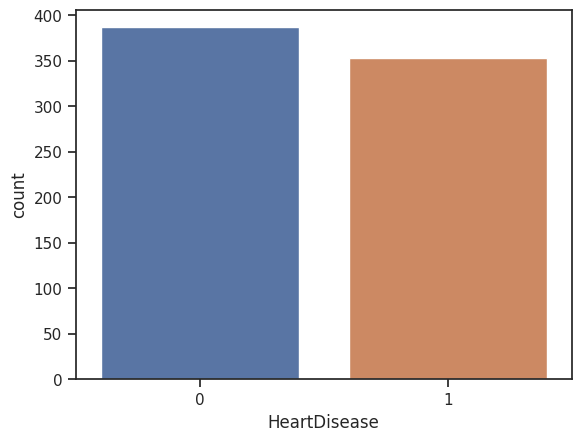

Counter({0: 387, 1: 353})
0 = 47.7027027027027 %  1 = 52.2972972972973 %


In [ ]:
# Visual Python: Visualization > Seaborn
from collections import Counter

sns.countplot(data=df, x='HeartDisease')
plt.show()

D = Counter(df['HeartDisease'])
print(D)
print("0 =", D[1]*100/(len(df['HeartDisease'])), '%  1 =',D[0]*100/(len(df['HeartDisease'])) ,'%')

Berdasarkan countplot yang telah dibuat, mayoritas pasien berada dalam kategori normal. Namun, jumlah pasien yang menderita penyakit jantung juga tidak bisa diabaikan karena jumlahnya hampir sebanding dengan pasien normal.
- Counter:
  Kelas "1" (penyakit jantung) terdapat 353 pasien.
  Kelas "0" (normal) terdapat 387 pasien.


# **8. Membangun Model**

## Model Regresi Logistik

In [ ]:
reglog = LogisticRegression().fit(xTrain, yTrain)
prediksi_regLog = reglog.predict(xTest)
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[105  17]
 [ 11  85]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       122
           1       0.83      0.89      0.86        96

    accuracy                           0.87       218
   macro avg       0.87      0.87      0.87       218
weighted avg       0.87      0.87      0.87       218



Text(53.75, 0.5, 'Truth')

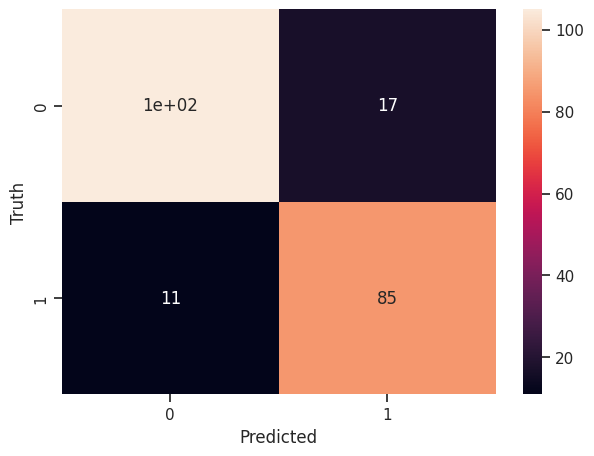

In [ ]:





from sklearn.metrics import classification_report, confusion_matrix
# visualisasi confusion matrix
cm = confusion_matrix(yTest, prediksi_regLog)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Berikut adalah interpretasi hasil:

Confusion Matrix:

- True Negative (TN): Ada 105 pasien yang normal dan diprediksi normal oleh model test data.
- False Positive (FP): Ada 17 pasien yang normal namun diprediksi menderita penyakit jantung oleh model test data.
- False Negative (FN): Ada 11 pasien dengan penyakit jantung namun diprediksi normal oleh model test data.
- True Positive (TP): Ada 85 pasien dengan penyakit jantung dan diprediksi menderita penyakit jantung oleh model test data.

Presisi:

- Presisi adalah salah satu metrik evaluasi kinerja model klasifikasi yang mengukur seberapa akurat model dalam mengidentifikasi kelas positif dari semua prediksi positif.
  - Presisi untuk kategori 0 (normal) adalah 0.91, yang berarti 91% dari prediksi model adalah benar, dan 9% adalah prediksi positif palsu.
  - Presisi untuk kategori 1 (penyakit jantung) adalah 0.83, yang berarti 83% dari prediksi model adalah benar, dan 17% adalah prediksi positif palsu.

Recall:

- Recall adalah salah satu metrik evaluasi kinerja model klasifikasi yang mengukur seberapa baik model dalam mendeteksi semua instance yang seharusnya termasuk dalam kelas positif.
  - Recall untuk kategori 0 (normal) adalah 86%, yang berarti model cenderung tidak salah dalam mengklasifikasikan pasien yang seharusnya normal.
  - Recall untuk kategori 1 (penyakit jantung) adalah 89%, yang berarti model cenderung tidak salah dalam mengklasifikasikan pasien yang seharusnya menderita penyakit jantung.

F1-Score:

- F1-Score adalah salah satu metrik evaluasi kinerja model klasifikasi yang mengukur keseimbangan antara kemampuan model dalam mengidentifikasi instance positif (recall) dan meminimalkan kesalahan prediksi positif palsu (presisi).
  - F1-Score untuk kategori 0 (normal) adalah 88%, yang berarti model cenderung memiliki kinerja yang mendekati sempurna.
  - F1-Score untuk kategori 1 (penyakit jantung) adalah 86%, yang berarti model cenderung memiliki kinerja yang mendekati sempurna.

In [ ]:
mulai = time.time()
scores_regLog = cross_val_score(reglog, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.86 (+/- 0.11), Waktu = 0.337 detik


Akurasi mengukur seberapa baik model dalam mengklasifikasikan data dengan tepat, baik untuk kelas positif atau negatif. Model regresi logistik yang telah dibuat menunjukkan akurasi sebesar 86% dengan standar deviasi 0.11. Ini berarti bahwa model berhasil memprediksi nilai yang benar sebanyak 86% dari keseluruhan data.

RegLog    0.763889
dtype: float64

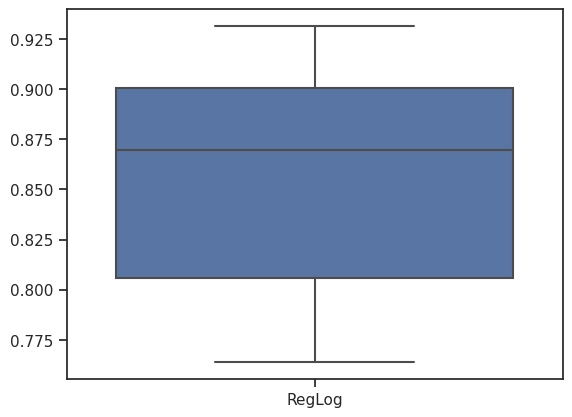

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog})
p = sns.boxplot(data = df_)
df_.min()

Berdasarkan boxplot yang telah dibuat, skor model regresi logistik diperoleh sebesar 0.763889.

In [ ]:
# Menampilkan intercept dan koefisien
print('Intercept:', reglog.intercept_[0])
print('Classes:', reglog.classes_)

# Membuat dataframe untuk koefisien
coefficients_df = pd.DataFrame({'Coeff': reglog.coef_[0]}, index=xTrain.columns)

# Mengurutkan dataframe berdasarkan nilai absolut koefisien
sorted_coefficients = coefficients_df.abs().sort_values(by='Coeff', ascending=False)

# Menampilkan 10 variabel prediktor yang paling penting
top_10_variables = sorted_coefficients.head(10)
print(top_10_variables)

Intercept: -0.20649150054285004
Classes: [0 1]
          Coeff
_ASY   1.129204
_Up    1.095819
_F     0.898698
_Flat  0.892110
_ATA   0.804182
_M     0.706574
_N     0.648337
_0     0.457596
_Y     0.456214
_ST    0.400118


interpretasi:

1. **Intercept:**
   - Intercept: Nilai intercept adalah -0.20649150054285004. Ini adalah nilai dasar log-odds dari kelas 1 (penyakit jantung) terjadi jika semua variabel prediktor adalah 0.
   - Kelas: Kelas yang diprediksi oleh model adalah 0 dan 1. Dalam konteks ini, 0 mewakili ‘Normal’ dan 1 mewakili ‘Penyakit Jantung’.

2. **Variabel Kategorikal:**
   - Setiap variabel kategorikal memiliki koefisien yang menunjukkan sejauh mana variabel tersebut mempengaruhi log-odds dari kategori 1 (HeartDisease). Koefisien positif menunjukkan peningkatan log-odds, sementara koefisien negatif menunjukkan penurunan log-odds.

   - **_ASY:** Koefisien 1.1292, menunjukkan bahwa pasien yang memiliki tipe nyeri dada "ASY" memiliki log-odds yang lebih tinggi untuk memiliki penyakit jantung.
   - **_Up:** Koefisien 1.0958, menunjukkan bahwa pasien yang memiliki kemiringan puncak segmen ST "Up" memiliki log-odds yang lebih tinggi untuk memiliki penyakit jantung.
   - **_F:** Koefisien 0.8987, menunjukkan bahwa pasien yang memiliki jenis kelamin "F" (Female) memiliki log-odds yang lebih tinggi untuk memiliki penyakit jantung.
   - **_Flat:** Koefisien 0.8921, menunjukkan bahwa pasien yang memiliki kemiringan puncak segmen ST "Flat" memiliki log-odds yang lebih tinggi untuk memiliki penyakit jantung.

   ...dan seterusnya.

3. **Trend atau Pola:**
   - Dapat diamati bahwa beberapa variabel kategorikal memiliki koefisien positif yang lebih tinggi, menunjukkan hubungan positif dengan kemungkinan penyakit jantung. Variabel "ASY" dan "Up" memiliki koefisien tertinggi, yang berarti pasien dengan tipe nyeri dada "ASY" dan kemiringan segmen ST "Up" memiliki log-odds yang paling tinggi untuk memiliki penyakit jantung.
   
   - Sebaliknya, variabel "ST" memiliki koefisien positif yang lebih rendah, tetapi masih menunjukkan hubungan positif.

In [ ]:
import numpy as np

# Menampilkan intercept dan koefisien
intercept = reglog.intercept_[0]
coefficients = reglog.coef_[0]

# Nama variabel prediktor
predictor_names = xTrain.columns

# Membangun persamaan regresi
equation = f'y = 1 / (1 + e^(-({intercept} + {" + ".join([f"({coefficients[i]:.4f} * {predictor_names[i]})" for i in range(len(coefficients))])})))'

# Menampilkan persamaan regresi
print('Persamaan Regresi Logistik:')
print(equation)

Persamaan Regresi Logistik:
y = 1 / (1 + e^(-(-0.20649150054285004 + (0.0173 * Age) + (-0.0030 * RestingBP) + (0.0011 * Cholesterol) + (-0.0070 * RestingECGBaru) + (0.3808 * Oldpeak) + (-0.8987 * _F) + (0.7066 * _M) + (1.1292 * _ASY) + (-0.8042 * _ATA) + (-0.3192 * _NAP) + (-0.1979 * _TA) + (-0.4576 * _0) + (0.2655 * _1) + (0.2754 * _LVH) + (-0.0674 * _Normal) + (-0.4001 * _ST) + (-0.6483 * _N) + (0.4562 * _Y) + (0.0116 * _Down) + (0.8921 * _Flat) + (-1.0958 * _Up))))


## Model Decision Tree

In [ ]:
DT = tree.DecisionTreeClassifier()
DT = DT.fit(xTrain, yTrain)
prediksi_DT = DT.predict(xTest)

print(confusion_matrix(yTest, prediksi_DT))
print(classification_report(yTest, prediksi_DT))

[[93 29]
 [18 78]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       122
           1       0.73      0.81      0.77        96

    accuracy                           0.78       218
   macro avg       0.78      0.79      0.78       218
weighted avg       0.79      0.78      0.79       218



Berikut adalah interpretasi hasil:

Confusion Matrix:

- Ada 93 pasien yang normal dan diprediksi normal oleh model test data.
- Ada 29 pasien yang normal namun diprediksi menderita penyakit jantung oleh model test data.
- Ada 18 pasien dengan penyakit jantung namun diprediksi normal oleh model test data.
- Ada 78 pasien dengan penyakit jantung dan diprediksi menderita penyakit jantung oleh model test data.

Presisi:

- Presisi adalah salah satu metrik evaluasi kinerja model klasifikasi yang mengukur seberapa akurat model dalam mengidentifikasi kelas positif dari semua prediksi positif.
  - Presisi untuk kategori 0 (normal) adalah 0.78, yang berarti 78% dari prediksi model adalah benar, dan 22% adalah prediksi positif palsu.
  - Presisi untuk kategori 1 (penyakit jantung) adalah 0.79, yang berarti 79% dari prediksi model adalah benar, dan 21% adalah prediksi positif palsu.

Recall:

- Recall adalah salah satu metrik evaluasi kinerja model klasifikasi yang mengukur seberapa baik model dalam mendeteksi semua instance yang seharusnya termasuk dalam kelas positif.
  - Recall untuk kategori 0 (normal) adalah 76%, yang berarti model cenderung tidak salah dalam mengklasifikasikan pasien yang seharusnya normal.
  - Recall untuk kategori 1 (penyakit jantung) adalah 81%, yang berarti model cenderung tidak salah dalam mengklasifikasikan pasien yang seharusnya menderita penyakit jantung.

F1-Score:

- F1-Score adalah salah satu metrik evaluasi kinerja model klasifikasi yang mengukur keseimbangan antara kemampuan model dalam mengidentifikasi instance positif (recall) dan meminimalkan kesalahan prediksi positif palsu (presisi).
  - F1-Score untuk kategori 0 (normal) adalah 80%, yang berarti model cenderung memiliki kinerja yang mendekati sempurna.
  - F1-Score untuk kategori 1 (penyakit jantung) adalah 77%, yang berarti model cenderung memiliki kinerja yang mendekati sempurna.

In [ ]:
def DT_feature_importance(x_train,y_train):
  importances = DT.feature_importances_

  final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
  final_df.set_index('Importances')

  final_df = final_df.sort_values('Importances',ascending=False)

  pd.Series(DT.feature_importances_, index=x_train.columns).nlargest(10).plot(kind='barh', title='Decison Tree Feature Importance')
  return final_df

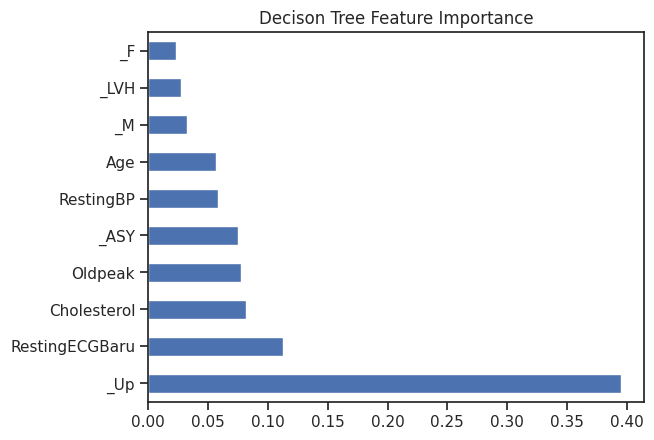

In [ ]:
feature_importance = DT_feature_importance(xTrain, yTrain)

interpretasi fitur model decision tree mengggunakan fitur important yang paling mempengaruhi dalam prediksi heart disease:

   - **_ASY:** menunjukkan bahwa pasien yang memiliki tipe nyeri dada "ASY" memiliki nilai penting yang lebih tinggi untuk memiliki penyakit jantung.
   - **_Up:** menunjukkan bahwa pasien yang memiliki kemiringan puncak segmen ST "Up" memiliki nilai penting untuk memiliki penyakit jantung.
   -  **RestingECGBaru**, **"RestingBP**, dan **Age** juga memiliki nilai yang cukup tinggi, menunjukkan bahwa hasil elektrokardiogram istirahat dan usia pasien dapat memberikan informasi yang berarti tentang penyakit jantung.
  
   ...dan seterusnya.

In [ ]:
DT.feature_importances_

array([0.05622079, 0.05849262, 0.08206691, 0.1126565 , 0.07776552,
       0.02274658, 0.03208882, 0.07524812, 0.00623086, 0.        ,
       0.00937764, 0.        , 0.01487522, 0.02719346, 0.        ,
       0.00808897, 0.00546715, 0.01260018, 0.        , 0.00393756,
       0.39494311])

Fitur pertama memiliki nilai penting sebesar 0.04763893, fitur kedua sebesar 0.08507084, fitur ketiga sebesar 0.08644539, dan seterusnya. Semakin tinggi nilai penting maka semakin besar kontribusi fitur tersebut dalam membuat prediksi menggunakan model Decision Tree.

In [ ]:
import numpy as np

# Dapatkan indeks fitur penting dalam urutan menurun
indices = np.argsort(DT.feature_importances_)[::-1]

# Dapatkan 10 fitur terpenting
top_10_features = indices[:10]

print("10 fitur terpenting adalah:")
for i in range(10):
    print(f"Fitur {i+1}: {top_10_features[i]} dengan nilai penting: {DT.feature_importances_[top_10_features[i]]}")


10 fitur terpenting adalah:
Fitur 1: 20 dengan nilai penting: 0.3949431102726361
Fitur 2: 3 dengan nilai penting: 0.11265649730080729
Fitur 3: 2 dengan nilai penting: 0.0820669133977577
Fitur 4: 4 dengan nilai penting: 0.07776552461981402
Fitur 5: 7 dengan nilai penting: 0.07524811860264267
Fitur 6: 1 dengan nilai penting: 0.05849261566850352
Fitur 7: 0 dengan nilai penting: 0.05622078913013374
Fitur 8: 6 dengan nilai penting: 0.03208882037650877
Fitur 9: 13 dengan nilai penting: 0.027193462202303096
Fitur 10: 5 dengan nilai penting: 0.02274658022840391


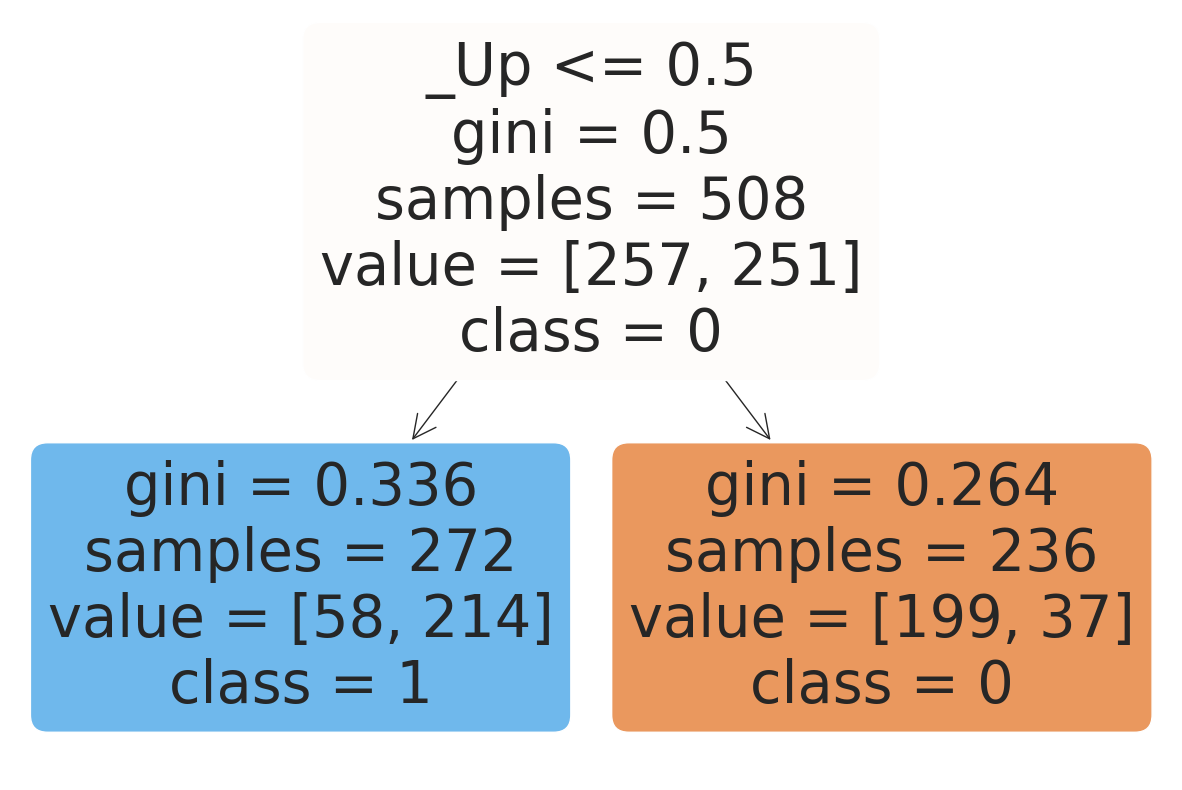

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Ambil fitur terpenting
top_5_features_indices = DT.feature_importances_.argsort()[-1:][::-1]
top_5_feature_names = xTrain.columns[top_5_features_indices]

# Membuat model decision tree hanya dengan fitur terpenting
DT_top_5 = tree.DecisionTreeClassifier()
DT_top_5 = DT_top_5.fit(xTrain[top_5_feature_names], yTrain)

# Visualisasi pohon keputusan
plt.figure(figsize=(15, 10))
tree.plot_tree(DT_top_5, feature_names=top_5_feature_names, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

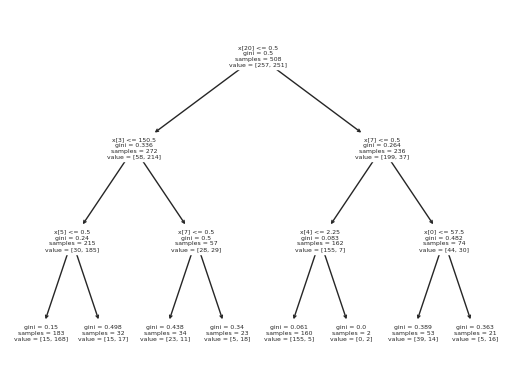

In [ ]:
# Gambar yang lebih jelas
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
clf = clf.fit(xTrain, yTrain)
p = tree.plot_tree(clf)

Hasil plot di atas menunjukkan bagaimana model membuat keputusan berdasarkan fitur-fitur dalam data.

In [ ]:
mulai = time.time()
scores_dt = cross_val_score(DT, predictor, target, cv=10)
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.79 (+/- 0.17), Waktu = 0.080 detik


Model Decision Tree menunjukkan akurasi sebesar 79% dengan standar deviasi 0.17, yang berarti model berhasil dalam memprediksi nilai yang benar sebanyak 79% dari keseluruhan data.

RegLog     0.763889
DecTree    0.666667
dtype: float64

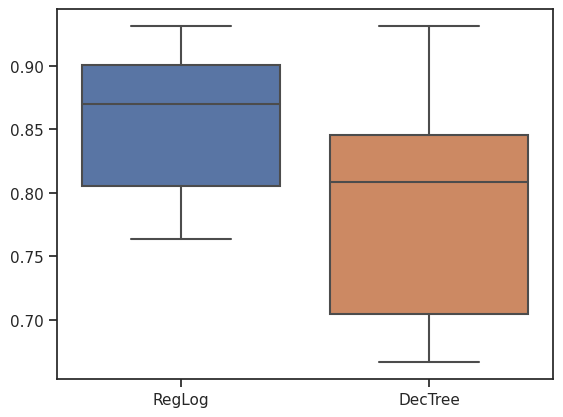

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog, "DecTree":scores_dt})
p = sns.boxplot(data = df_)
df_.min()

**Interpretasi:**

- Distribusi skor akurasi Regresi Logistik (RegLog) cenderung dimulai dari sekitar 0.75 (75%) hingga nilai tertinggi yang mungkin.
- Distribusi skor akurasi Decision Tree (DecTree) cenderung dimulai dari sekitar 0.71 (71%) hingga nilai tertinggi yang mungkin.


# **9. Mengevaluasi Hasil Pemodelan**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn import linear_model

pipeSVM = make_pipeline(linear_model.LogisticRegression())
print(sorted(pipeSVM.get_params().keys()))

['logisticregression', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start', 'memory', 'steps', 'verbose']


In [ ]:
# Hyperparameter optimization pada model Regresi Logistik menggunakan gridCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'class_weight':[None, 'balanced']}]

grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_search.fit(xTrain, yTrain)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
0.8542613084837896
{'solver': 'lbfgs'}


**Interpretasi:**

- Proses GridSearchCV membantu mencari kombinasi hyperparameter terbaik untuk meningkatkan kinerja model.
- Akurasi sekitar 0.8542613084837896 adalah nilai terbaik yang diperoleh dari metrik evaluasi selama proses Grid Search mencerminkan kinerja model Regresi Logistik setelah tuning hyperparameter.
- Hyperparameter terbaik atau kombinasi parameter terbaik dalam Grid Search, parameter solver diatur sebagai 'lbfgs'.


In [ ]:
pipeDT = make_pipeline(tree.DecisionTreeClassifier())
print(sorted(pipeDT.get_params().keys()))

['decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter', 'memory', 'steps', 'verbose']


In [ ]:
# Optimal parameter Desion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree_model=DecisionTreeClassifier()
dtree_gscv = RandomizedSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv.fit(xTrain, yTrain)

print(dtree_gscv.best_score_)
print(dtree_gscv.best_params_)

0.832549019607843
{'max_depth': 6, 'criterion': 'gini'}


**Interpretasi:**

- Proses RandomizedSearchCV membantu mencari kombinasi hyperparameter terbaik untuk meningkatkan kinerja model Decision Tree.
- Akurasi sekitar 84.23% mencerminkan kinerja model setelah tuning hyperparameter.
- Hyperparameter terbaik yang ditemukan adalah 'max_depth': 5 dan 'criterion': 'gini', menunjukkan bahwa kedalaman maksimum pohon adalah 5 dan kriteria gini dianggap lebih baik.

Accuracy RL: 0.86 (+/- 0.10)
Accuracy DT: 0.77 (+/- 0.13)


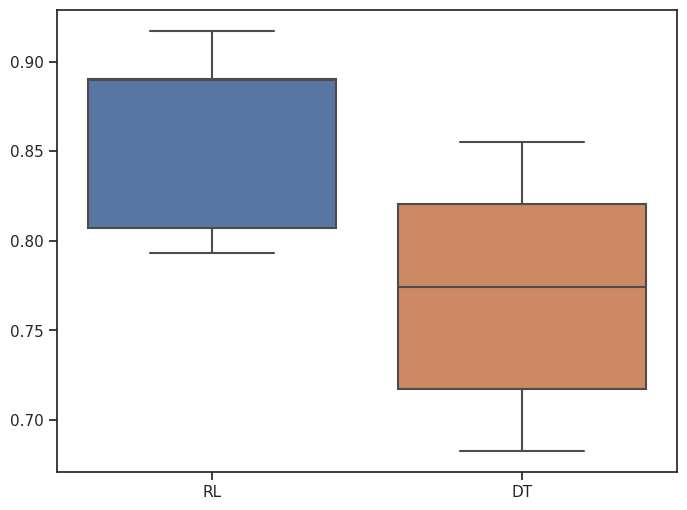

In [ ]:
kCV = 5
# Menggunakan parameter optimal
RL_opt = LogisticRegression(solver= 'newton-cg')
DT_opt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

# Melakukan Cross Validasi
models = ['RL', 'DT']
RL_score = cross_val_score(RL_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
DT_score = cross_val_score(DT_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
scores = [RL_score, DT_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p = sns.boxplot(data=pd.DataFrame(data), ax=ax)

**Hasil Cross Validation:**

Akurasi model Regresi Logistik (RL) adalah sekitar 86% dengan deviasi standar sekitar 10%.
Akurasi model Decision Tree (DT) adalah sekitar 77% dengan deviasi standar sekitar 13%.

**Interpretasi:**

- Hasil menunjukkan bahwa model Regresi Logistik (RL) memiliki akurasi yang lebih tinggi dibandingkan dengan model Decision Tree (DT) berdasarkan rata-rata cross-validation.
- Deviasi standar (variasi) akurasi yang relatif kecil menunjukkan bahwa model RL dan DT konsisten dalam performa mereka di setiap lipatan cross-validation.

# **Rekomendasi**

**1. Model**

Berdasarkan ukuran keberhasilan pengembangan model klasifikasi yang ditetapkan dengan akurasi lebih dari 70%, dapat dilihat bahwa model Regresi Logistik dan Decision Tree telah memenuhi kriteria tersebut dengan akurasi masing-masing sebesar 86% dan 77% setelah dilakukan Cross Validasi. Oleh karena itu, disarankan untuk menggunakan model Regresi Logistik sebagai pilihan utama dalam melakukan prediksi atau deteksi terhadap pasien dengan penyakit jantung. Hal ini dapat membantu dalam mengidentifikasi individu yang berisiko tinggi terkena penyakit kardiovaskuler dan memberikan intervensi yang tepat waktu.


**2. Fitur Important:**
  
  Variabel seperti jenis nyeri dada, kemiringan ST selama latihan, jenis kelamin, dan adanya angina selama latihan memiliki pengaruh signifikan dalam memprediksi penyakit jantung. Dokter dapat memperhatikan karakteristik ini saat melakukan evaluasi pasien.

**3. Optimasi Model:**
  
  Model Regresi Logistik telah dioptimalkan menggunakan GridSearchCV, dan model Decision Tree menggunakan RandomizedSearchCV. Dengan pengoptimalan ini, kinerja model dapat ditingkatkan.

**4. Implementasi dan Evaluasi Lebih Lanjut:**
  
  Model dapat diimplementasikan dalam lingkungan klinis dan dievaluasi lebih lanjut dengan melibatkan tim medis. Penilaian lebih lanjut dapat melibatkan feedback dari praktisi medis untuk meningkatkan kehandalan dan kegunaan model.

**5. Edukasi dan Kesadaran:**
   
   Meningkatkan edukasi dan kesadaran tentang faktor risiko penyakit jantung dapat membantu masyarakat lebih proaktif dalam menjaga kesehatan mereka. Informasi ini dapat digunakan untuk memberikan saran preventif kepada individu dengan risiko tinggi.

#Penerapan ML di dunia nyata

In [ ]:
# Contoh data pasien dengan usia 50 tahun, ChestPainType ASY, Cholesterol 200, dan Oldpeak 1.5 menggunakan model regresi logistik
new_patient_data = pd.DataFrame({
    'Age': [50],
    'ChestPainType_ASY': [1],
    'Cholesterol': [200],
    'Oldpeak': [1.5]
})

# Pilih hanya fitur yang digunakan selama pelatihan model
selected_features = xTrain.columns

# Pastikan bahwa data pasien baru mencakup semua fitur yang digunakan selama pelatihan
for feature in selected_features:
    if feature not in new_patient_data.columns:
        new_patient_data[feature] = 0  # Tambahkan kolom yang belum ada dan beri nilai default

# Urutkan kolom-kolom agar sesuai dengan urutan selama pelatihan
new_patient_data = new_patient_data[selected_features]

# Melakukan prediksi menggunakan model regresi logistik
prediction = reglog.predict(new_patient_data)

# Menampilkan hasil prediksi
if prediction[0] == 1:
    print('Pasien memiliki penyakit jantung.')
else:
    print('Pasien tidak memiliki penyakit jantung.')


Pasien memiliki penyakit jantung.


# **10. Analisis Korespondensi**

In [ ]:
install.packages('FactoMineR')
install.packages('ca')
library(ca)
library(FactoMineR)
library(dplyr)
library(tidyr)
library(tidyverse)



data = `heart_1_`
head(data)
str(data)

#Membuat data kategorik dengan memilih tipe data karakter
kategorik = data %>%
  select_if(is.character)

head(kategorik)
str(kategorik)



#Mengubah tipe data chr menjadi factor
kategorik$Sex = factor(kategorik$Sex)
kategorik$ChestPainType = factor(kategorik$ChestPainType)
kategorik$RestingECG = factor(kategorik$RestingECG)
kategorik$ExerciseAngina = factor(kategorik$ExerciseAngina)
kategorik$ST_Slope = factor(kategorik$ST_Slope)
kategorik$HeartDisease = factor(kategorik$HeartDisease)


head(kategorik)
str(kategorik)

# Menampilkan semua tingkat dari variabel
levels(kategorik$RestingECG)
levels(kategorik$ChestPainType)
levels(kategorik$ST_Slope)
levels(kategorik$ExerciseAngina)
levels(kategorik$HeartDisease)
levels(kategorik$Sex)

#Membuat tabel kontingensi multivariat
tabelMul = xtabs(~ HeartDisease + Sex + ChestPainType + RestingECG + ExerciseAngina + ST_Slope, data = kategorik)
tabelMul
View(tabelMul)


#Analisis MCA
mca.object <- MCA(kategorik, quali.sup=c(1,5), graph=FALSE)

##Menentukan Nilai Eigen
round(mca.object$eig, 2)


library("factoextra")
#eig.val <- get_eigenvalue(mca.object)
#head(eig.val)


#Visualisasi eigenvalue
barplot(mca.object$eig[,1], names.arg=paste("dim ", 1:nrow(mca.object$eig)), las=2)

plot.MCA(mca.object,
         invisible="ind",
         autoLab="yes",
         shadowtext=TRUE,
         habillage="quali",
         title="")

summary(mca.object)





#Tabel Inersia
inertia_table <- get_eigenvalue(mca.object)
print(inertia_table)


#inertia_table <- data.frame(
#  Dimension = 1:length(mca.object$eig$values),
#  Eigenvalue = mca.object$eig$values,
#  Percentage_of_Inertia = mca.object$eig$percent,
#  Cumulative_Percentage = cumsum(mca.object$eig$percent)
#)
#print(inertia_table)

fviz_screeplot(mca.object, addlabels = TRUE, ylim = c(0, 45))


head(kategorik)



#dataMCA = data[-c(1, 4:5, 8, 10)]
#head(dataMCA)



#MCA = as.data.frame(kategorik)
#korespond = PCA(MCA, quali.sup = NULL, graph = FALSE)
#summary(korespond)

#EDA
## Mengecek Missing Value pada Data
# Menghitung missing value per kolom
#missing_values <- colSums(is.na(dataMCA))

# Menampilkan hasil
#print(missing_value

Berdasarkan biplot MCA di atas setiap kategori memiliki warna yang sama. Dengan mengkombinasikan dua dimensi, plot di atas terbagi menjadi tiga cluster, yaitu:
- Cluster I (atas-kanan) menunjukkan pasien yang mengalami sakit dada typical angina (TA) dan non-anginal pain (NAP) cenderung tidak terdapat angina yang diinduksi oleh aktivitas fisik (ExerciseAngina.N), serta cenderung dialami oleh pasien wanita (F) dan tidak terdapat diagnosis penyakit jantung (0) dengan kondisi gelombang ST di atas (Up) dan rekam ECG normal (Normal) juga Hipertrofi Ventrikel Kiri (LVH).
- Cluster II (bawah-kiri) menunjukkan pasien yang mengalami sakit dada asymptomatic (ASY) terdapat angina yang diinduksi oleh aktivitas fisik (ExerciseAngina.Y), serta cenderung dialami oleh pasien pria (M) dan terdapat diagnosis penyakit jantung (1) dengan kondisi gelombang ST di bawah (Down).
- Cluster III (bawah-kanan) menunjukkan pasien yang mengalami sakit dada atypical angina (ATA) tidak terdapat angina yang diinduksi oleh aktivitas fisik (ExerciseAngina.N), serta cenderung dialami oleh pasien wanita (F) dan tidak terdapat diagnosis penyakit jantung (0) dengan
kondisi gelombang ST di atas (Up) dan rekam ECG normal (Normal).